# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

### Importing necessary libraries

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
)

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# plt.style.use("seaborn-dark")  # this adds beauty to charts
sns.set(rc={"figure.figsize": (10, 6)})

<IPython.core.display.Javascript object>

### Importing data

In [2]:
# reading in the data
hotel_data = pd.read_csv("INNHotelsGroup.csv")

# copying data to another variable to avoid any changes to original data
df = hotel_data.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
# viewing first 5 rows of the data
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

In [4]:
# viewing last 5 rows of the data
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

<IPython.core.display.Javascript object>

In [5]:
# viewing dimensions/shape of the data
df.shape

(36275, 19)

<IPython.core.display.Javascript object>

- There are 36,275 rows and 19 columns in our dataset

In [6]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

- There are 14 numerical columns and 5 columns with object type

In [7]:
# Checking or missing values
df.isnull().values.any()

False

<IPython.core.display.Javascript object>

- There are no missing values in our dataset

In [8]:
# checking for duplicate values
df.duplicated().sum().any()

False

<IPython.core.display.Javascript object>

- There are no duplicate values in our dataset

In [9]:
# Dropping the Booking_ID column since it adds no value to our data modelling.
df.drop("Booking_ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### checking the statistical summary of the data.

In [11]:
# data statistics
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

<IPython.core.display.Javascript object>

- The average number of adults per customers' booking details is 2
- The maximum number of adults per customers' booking details is 4
- The median number of weekend nights the guest stayed or booked to stay at the hotel is 1
- The median number of week nights the guest stayed or booked to stay at the hotel is 2
- Most o the guests are first timers
- The average price per room is about \\$103 

In [12]:
# data statistics for categorical variables
df.describe(include="object").T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

<IPython.core.display.Javascript object>

- most of the meals ordered were Meal Plan 1 with a total number of 27835 orders
- the most Type of room reserved by the customer is Room_Type 1 with 28130 total reservation 
- 24390 o the bookings were not canceled

## Univariate Analysis

#### Boxplot and Histogram

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,8))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

## Observations on lead time

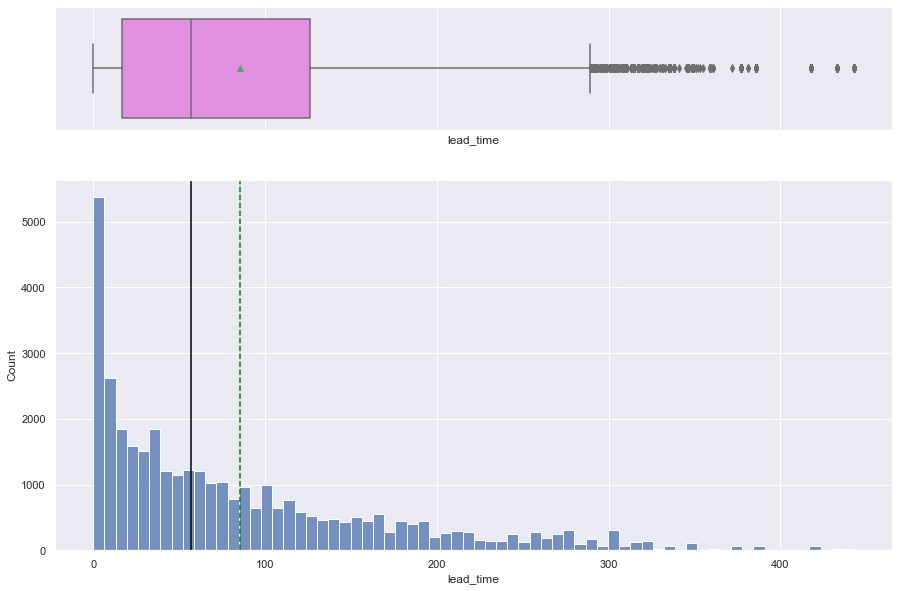

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "lead_time")

- The distribution of lead time is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

## Observations on average price per room

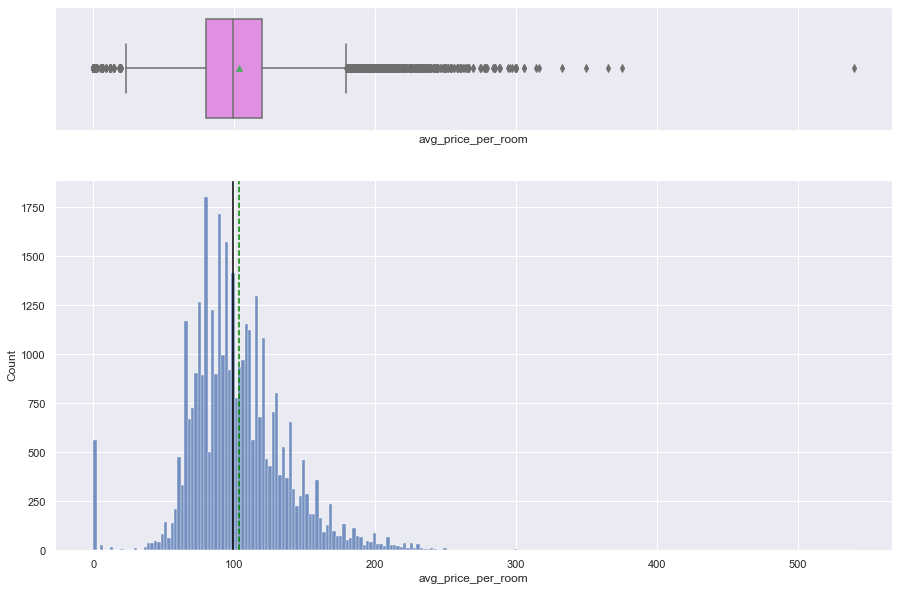

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "avg_price_per_room")

- The distribution of average price per room is right-skewed
- We will not treat these outliers as they represent the real market trend
- The Average price per room has an outlier which is above \\$500 and it can not be expalined. so the outlier will be treated

In [16]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

<IPython.core.display.Javascript object>

In [17]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

- Some of the rooms has an average price of zero or close to zero, lets observe the market segment types of such rooms

In [18]:
df[df["avg_price_per_room"] == 0]
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts(
    normalize=True
)

Complementary    0.649541
Online           0.350459
Name: market_segment_type, dtype: float64

<IPython.core.display.Javascript object>

- 65% of rooms with an average price close of zero has the Complementary market segment type
- 35% of rooms with an average price close of zero has the online market segment type

## Observations on number of previous booking cancellations

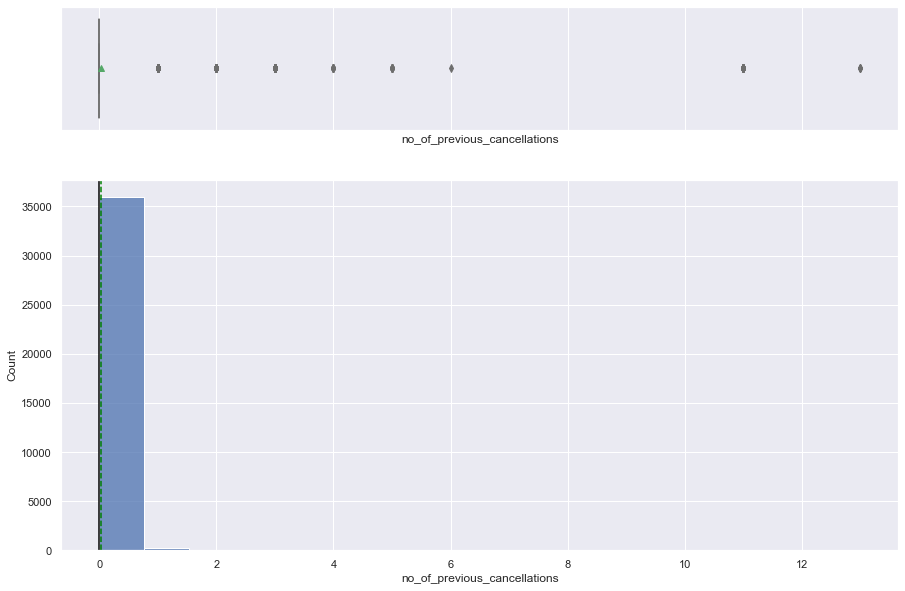

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "no_of_previous_cancellations")

- The distribution of no_of_previous_cancellations is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

In [20]:
df["no_of_previous_cancellations"].value_counts(normalize=True)

0     0.990682
1     0.005458
2     0.001268
3     0.001185
11    0.000689
5     0.000303
4     0.000276
13    0.000110
6     0.000028
Name: no_of_previous_cancellations, dtype: float64

<IPython.core.display.Javascript object>

- From the value counts, 99% of previous bookings, were not cancelled 

## Observations on number of previous booking not canceled

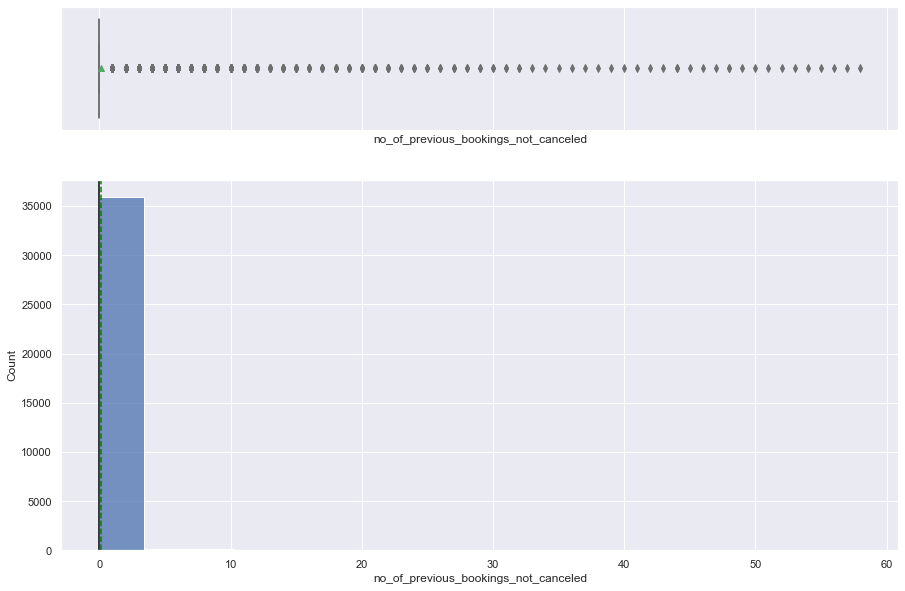

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

- The distribution of no_of_previous_bookings_not_canceled is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend
- A good number of previous booking were not cancelled

## Observations on arrival date

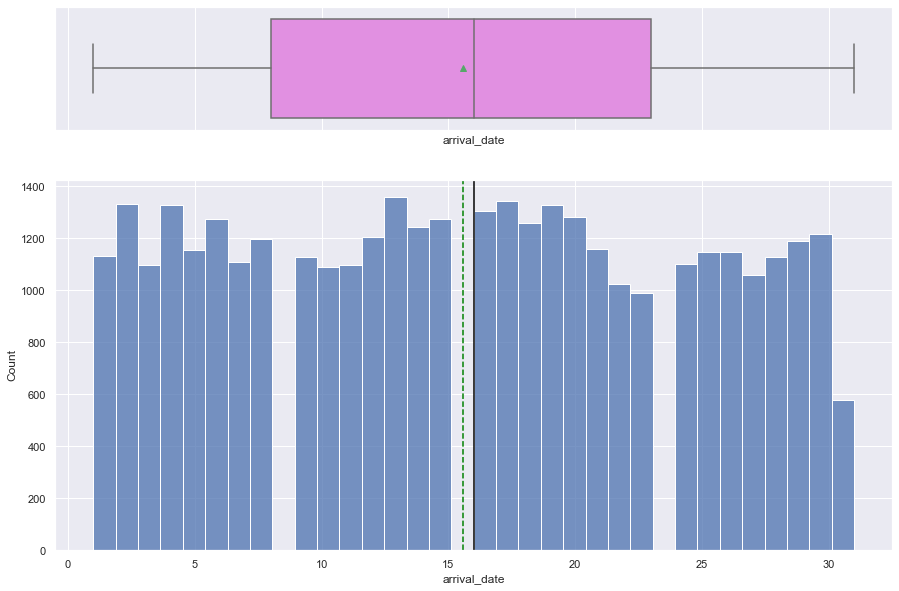

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "arrival_date")

- There are no skewness in the distribution
- The distribution of arrival date is close to a uniform distribution

## Observations on arrival month

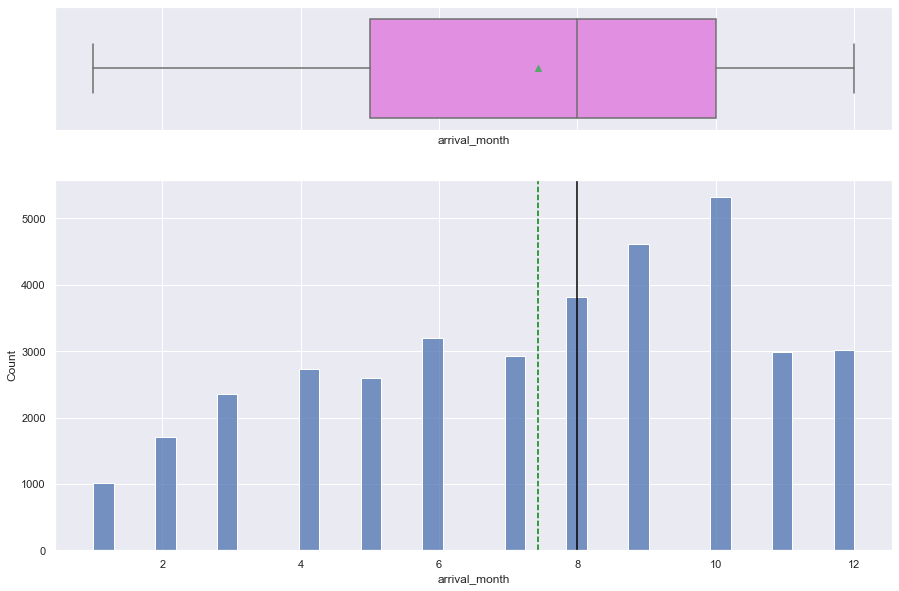

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "arrival_month")

- There are no skewness in the arrival month column
- The busiest months according to the distribution is October

## CountPlot of categorical and discrete variable

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Observations on number of adults

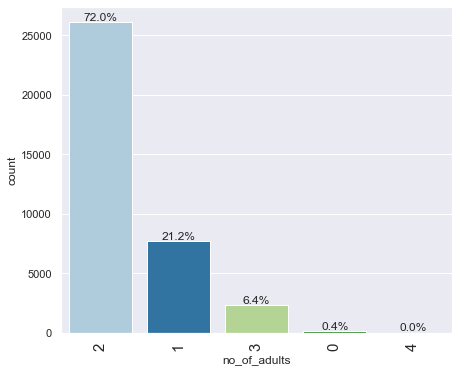

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "no_of_adults", perc=True)

- 72% of the bookings are bookings involving two adults

## Observations on number of children

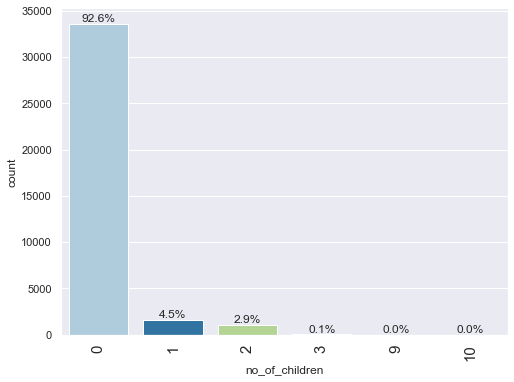

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "no_of_children", perc=True)

- 92% of the bookings are for adults only without chidren involved
- 9 or 10 numbers of children per booking can not be explained so will be treated as an outlier and replaced with 3 numbers of children

In [27]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

## Observations on number of week nights

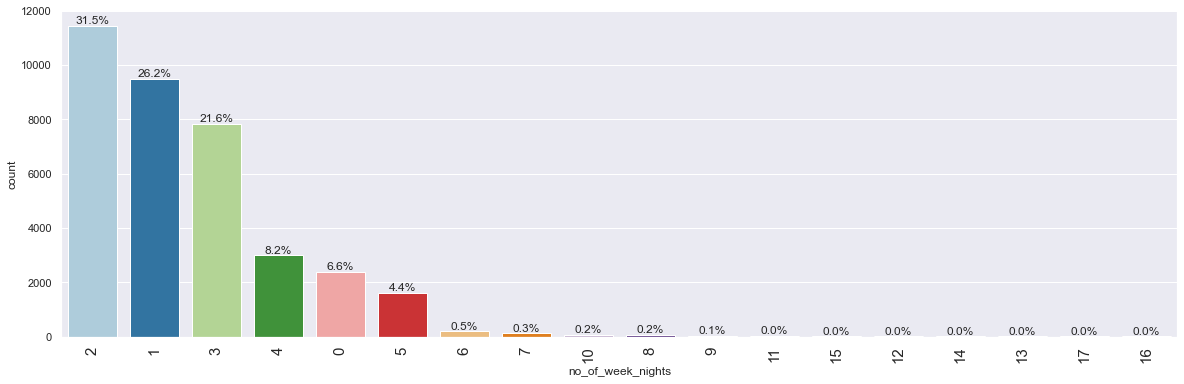

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "no_of_week_nights", perc=True)

- The plot shows that most customers booked/stayed for 2 week nights
- 32% of previous bookings were for 2 week nights only

## Observations on number of weekend nights

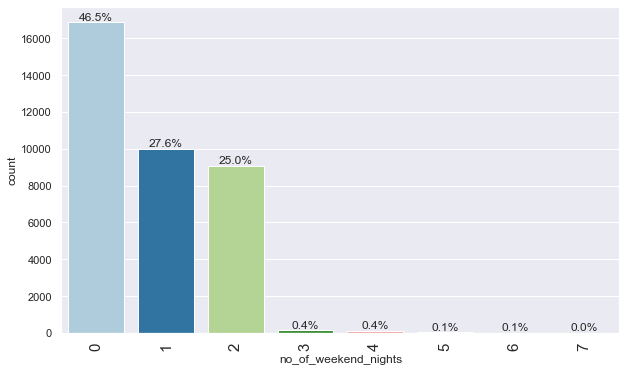

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

- The plot shows that most customers booked/stayed for weekends only booked 1 weekend nights
- 27.6% of previous bookings were for 1 weekend nights only

## Observations on required car parking space

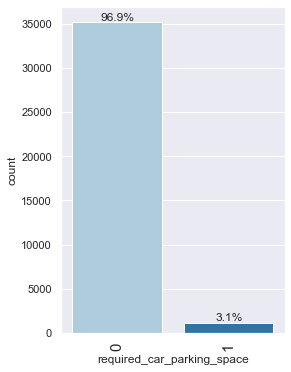

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "required_car_parking_space", perc=True)

- This plot shows the number of customers that require car parking space and those that don't.
- Most of the customers do not require parking space
- 96.9% of the customers do not need parking space`

## Observations on type of meal plan

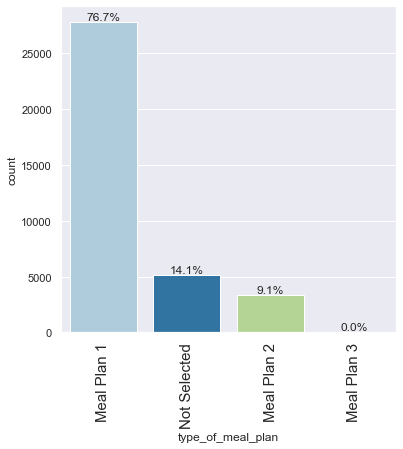

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

- This plot shows the type of meal plan booked by the customer
- Most of the customers booked the Meal Plan 1
- 76.1% of meal plan booked by customer is the meal plan 1

## Observations on room type reserved

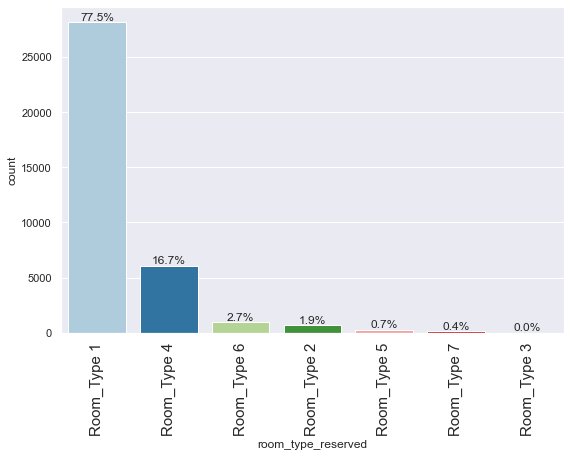

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "room_type_reserved", perc=True)

- This plot shows the type of room reserved by the customer
- Most of the customers booked the room type 1
- 77.5% of rooms booked by customer is the room type 1

## Observations on arrival month

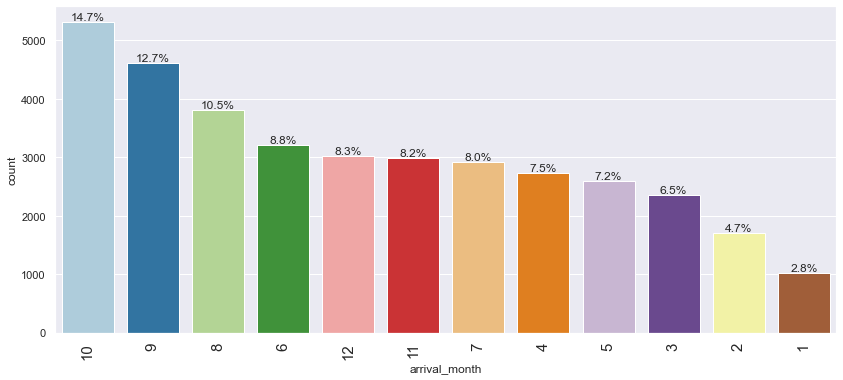

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "arrival_month", perc=True)

- This plot shows month of arrival of customer
- Most of the customers (14.7%) arrived in October, hence Octoner is the busiest month

## Observations on market segment type

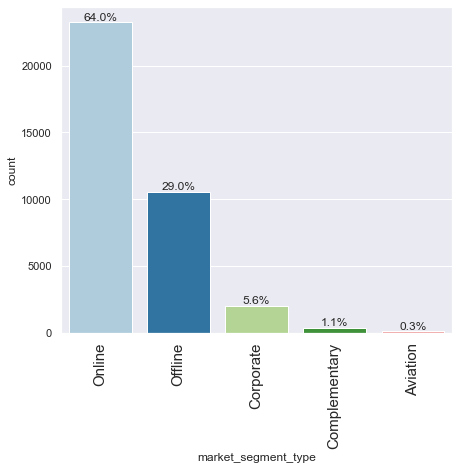

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "market_segment_type", perc=True)

- This plot shows the Market segment designation
- 64.0% of bookings by customer falls under the online market segment type

## Observations on number of special requests

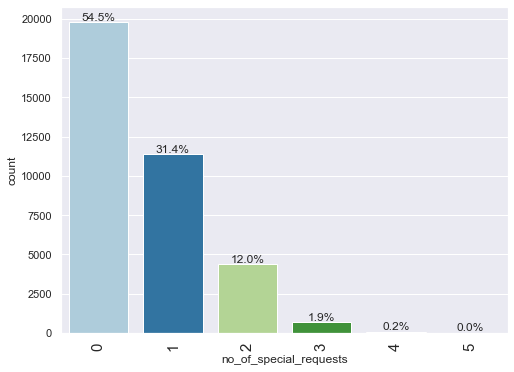

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "no_of_special_requests", perc=True)

- More than half (54.5%) of the customers have no special request
- about 31.4% of the customers had a special request

## Observations on booking status

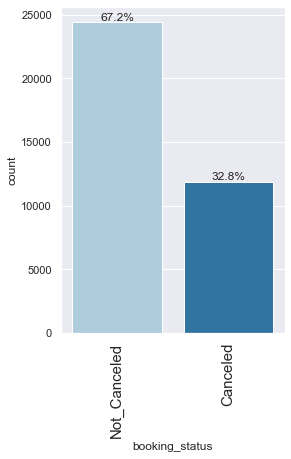

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "booking_status", perc=True)

- The class distribution in the target variable is imbalanced.
- We have 67.2% observations for bookings not cancelled and 32.8% observations for bookings that were cancelled.

## Bivariate Analysis

#### Heatmap

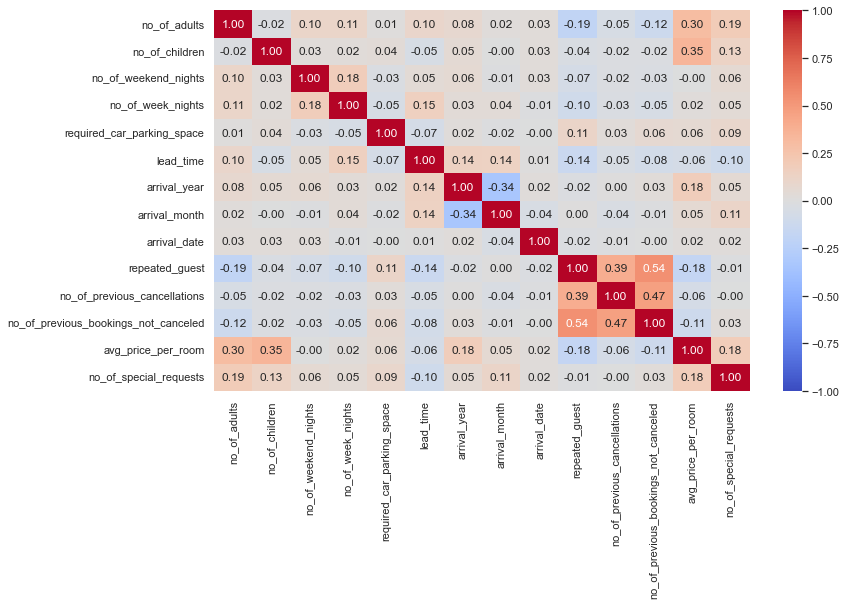

<IPython.core.display.Javascript object>

In [37]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

- number of special request and average price per room show a positive correlation
- number of previous bookings not cancelled and repeated guest show a positive coorelation
- number of previous bookings not cancelled and number of previous cancellation show a positive coorelation
- average price per room and number of children show a positive correlation
- average price per room and number of adults show a positive correlation
- number of adults and repeated guest show a negative correlation

### Pairplot of some continuous variables

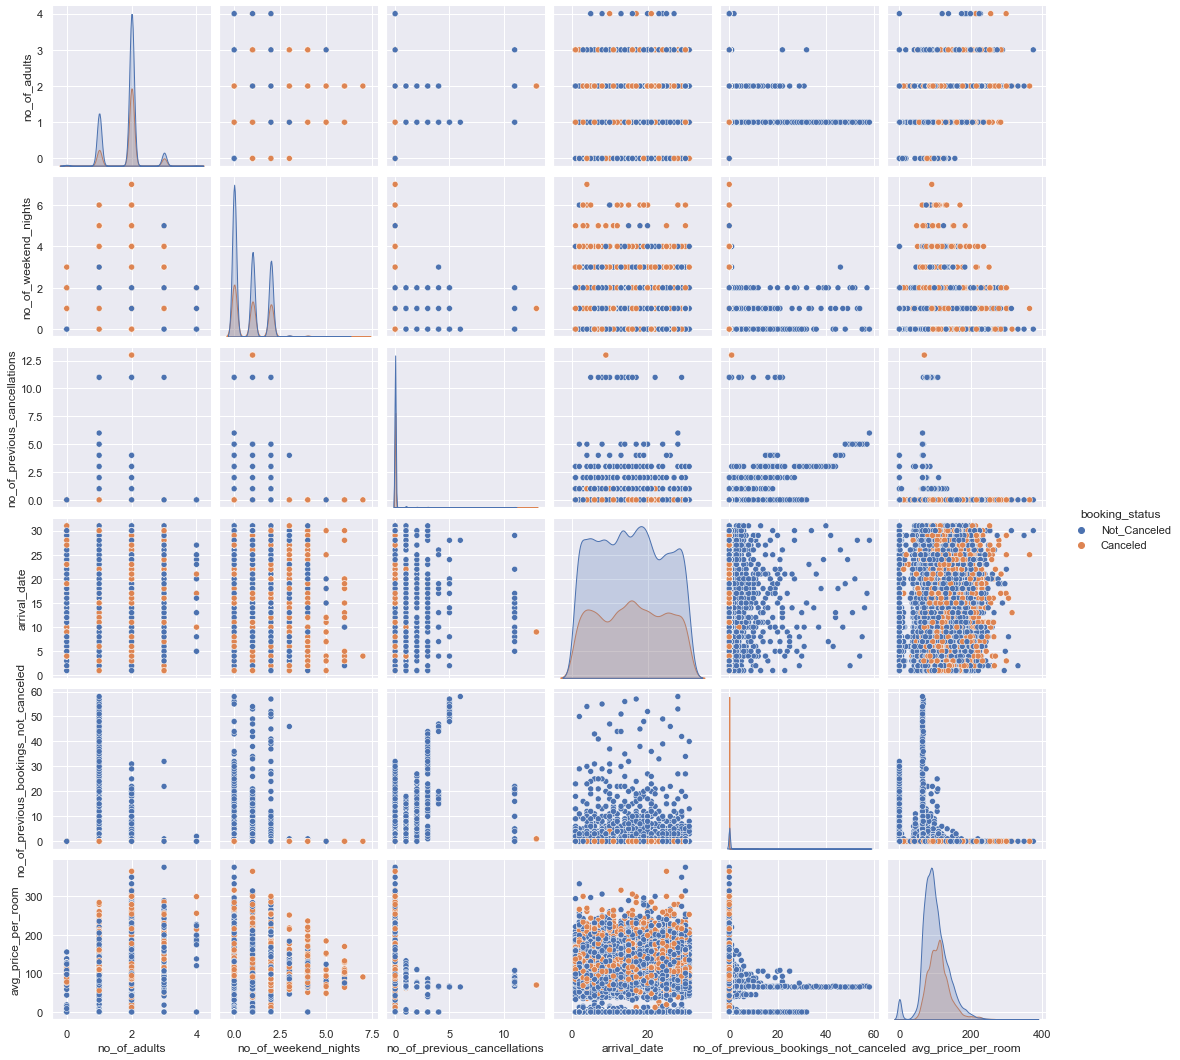

<IPython.core.display.Javascript object>

In [38]:
df_pair = df[
    [
        "no_of_adults",
        "no_of_weekend_nights",
        "no_of_previous_cancellations",
        "arrival_date",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
        "booking_status",
    ]
]

sns.pairplot(data=df_pair, hue="booking_status")
plt.xticks(rotation=90)
plt.yticks(rotation=180)
plt.show()

- There are no correlation seen among the variables plotted 

In [39]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(15, 12))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(
        f"Distribution of {predictor} \n for target=" + str(target_uniq[0]), fontsize=15
    )
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(
        f"Distribution of {predictor} \n for target=" + str(target_uniq[1]), fontsize=15
    )
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [40]:
def unstacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    tab1.rename(columns={"All": "Total"}, inplace=True)
    tab1[f"% {tab1.columns[0]}"] = (tab1.iloc[:, 0] / tab1.iloc[:, 2]) * 100
    tab1[f"% {tab1.columns[1]}"] = (tab1.iloc[:, 1] / tab1.iloc[:, 2]) * 100
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=False, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Let's see how prices vary across different market segments**

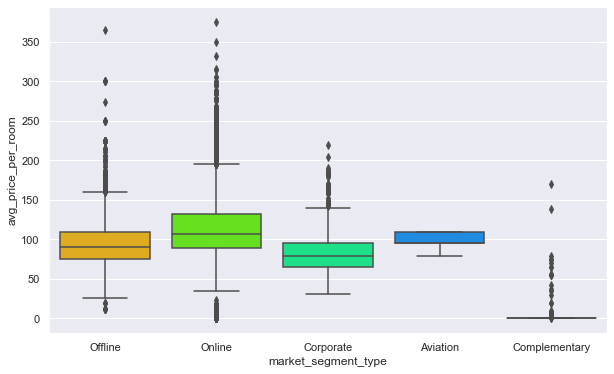

<IPython.core.display.Javascript object>

In [41]:
# Hotel rates are dynamic and change according to demand and customer demographics.
# This plot shows how prices vary across different market segments

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- Bookings via Online market segment type seems to be more expensive
- Bookings via Complimnetry market segment type is the cheapest
 

**Let's see how booking status varies across different market segments.**

booking_status       Canceled  Not_Canceled  Total  % Canceled  % Not_Canceled
market_segment_type                                                           
All                     11885         24390  36275   32.763611       67.236389
Online                   8475         14739  23214   36.508142       63.491858
Offline                  3153          7375  10528   29.948708       70.051292
Corporate                 220          1797   2017   10.907288       89.092712
Aviation                   37            88    125   29.600000       70.400000
Complementary               0           391    391    0.000000      100.000000
------------------------------------------------------------------------------------------------------------------------


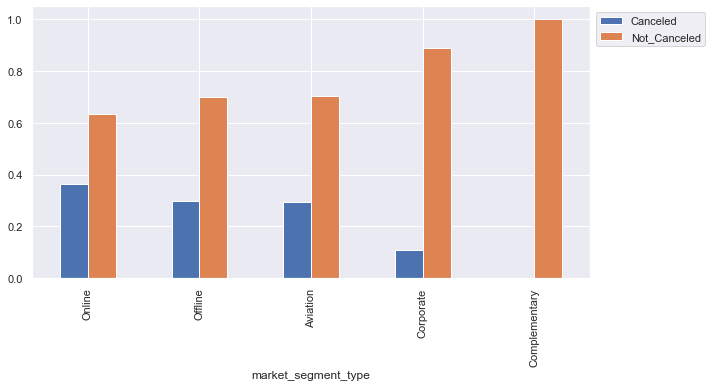

<IPython.core.display.Javascript object>

In [42]:
unstacked_barplot(df, "market_segment_type", "booking_status")

- Most people that cancelled are those online market segment type
- 36.5% of online market segment type cancelled
- none from complimentary market segment type cancelled

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

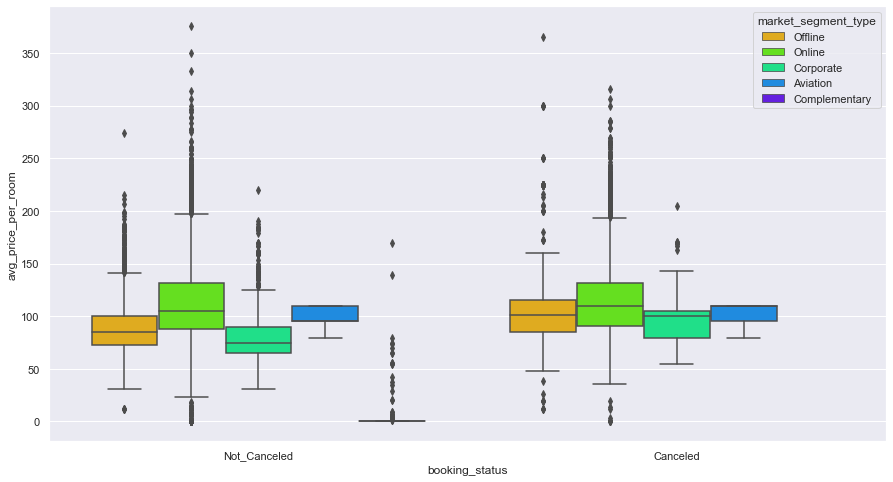

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=df,
    x="booking_status",
    y="avg_price_per_room",
    palette="gist_rainbow",
    hue="market_segment_type",
)
plt.show()

- The median price per room in the online market segment type for both cancelled and not cancelled status are almost the same
- The median price per room for bookings that were cancelled in the offline and coorperate market segment type is higher than the  median price per room for bookings that were not cancelled in the same market segment type
- Price can be a factor why people cancel their bookings

**Let's see how special requirements impacts cancellations**

booking_status          Canceled  Not_Canceled  Total  % Canceled  \
no_of_special_requests                                              
All                        11885         24390  36275   32.763611   
0                           8545         11232  19777   43.206755   
1                           2703          8670  11373   23.766816   
2                            637          3727   4364   14.596700   
3                              0           675    675    0.000000   
4                              0            78     78    0.000000   
5                              0             8      8    0.000000   

booking_status          % Not_Canceled  
no_of_special_requests                  
All                          67.236389  
0                            56.793245  
1                            76.233184  
2                            85.403300  
3                           100.000000  
4                           100.000000  
5                           100.000000  
---------

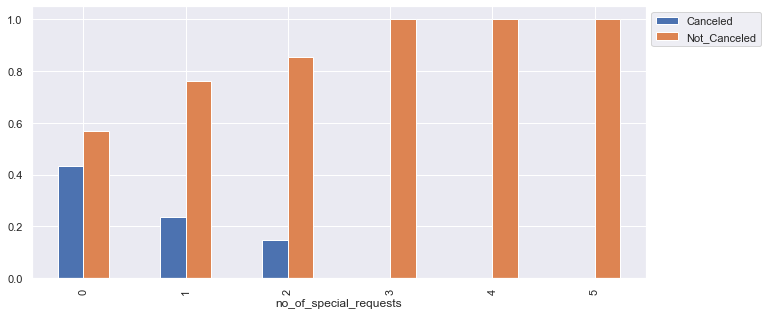

<IPython.core.display.Javascript object>

In [44]:
# Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations
unstacked_barplot(df, "no_of_special_requests", "booking_status")

- Only a tiny fraction of customers with special request cancelled

**Let's see if the special requests made by the customers impacts the prices of a room**

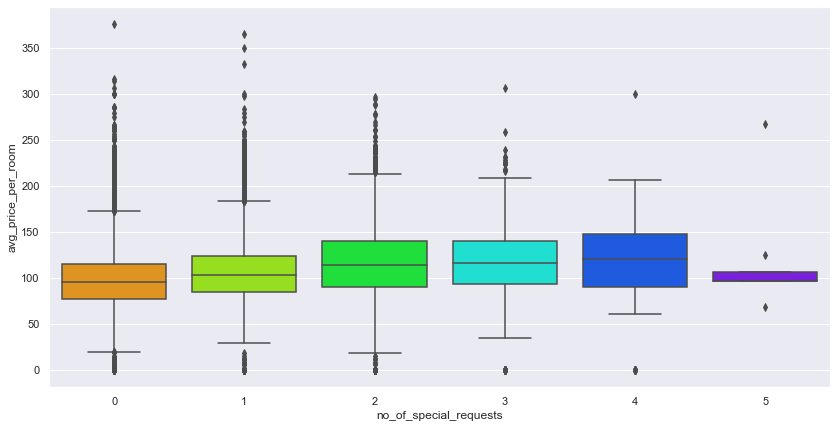

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- There is no significant impact in the price of room for those with special request, when compared to those with no special request

**There is a positive correlation between booking status and average price per room. Let's analyze it**

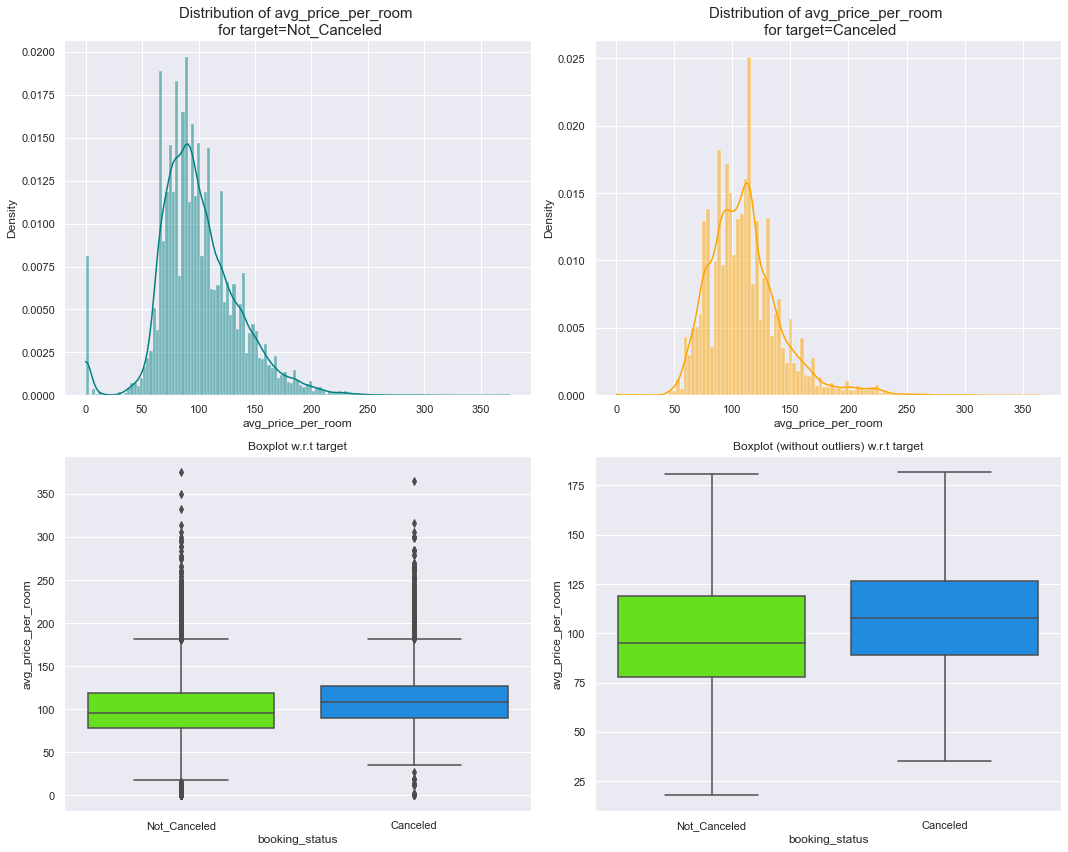

<IPython.core.display.Javascript object>

In [46]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

- We can see that the second and third quartiles of prices of rooms that were cancelled is more than the second and third quartiles of prices of rooms that were not cancelled.
- This shows that customers might cancel their booking if they feel they are paying too much for the room.

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

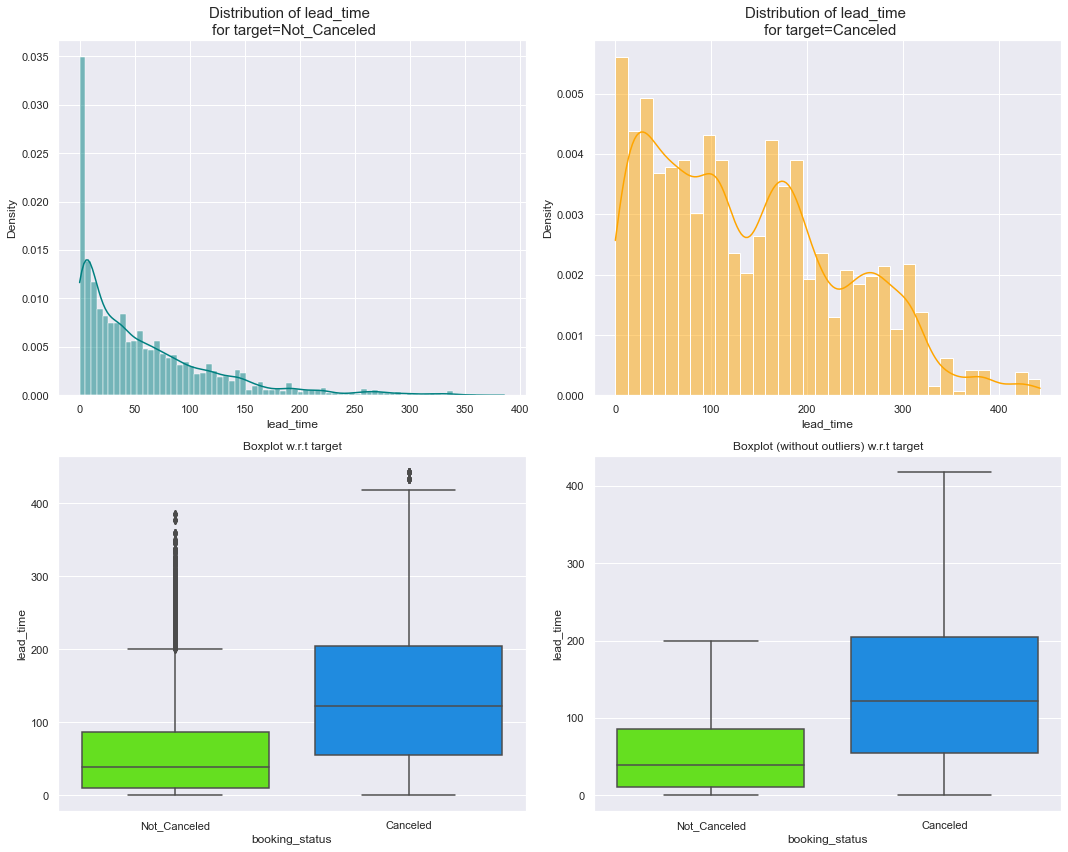

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

- lead_time is the number of days between the date of booking and the arrival date
- We can see that the second and third quartiles of the lead time of rooms that were cancelled is much more than the second and third quartiles of lead time of rooms that were not cancelled.
- This shows that customers having many number of days between the date of booking and the arrival date are likely cancel

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [48]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

<IPython.core.display.Javascript object>

In [49]:
family_data["no_of_family_members"] = family_data["no_of_adults"] + family_data["no_of_children"]


<IPython.core.display.Javascript object>

booking_status        Canceled  Not_Canceled  Total  % Canceled  \
no_of_family_members                                              
All                       9985         18456  28441   35.107767   
2                         8213         15506  23719   34.626249   
3                         1368          2425   3793   36.066438   
4                          398           514    912   43.640351   
5                            6            11     17   35.294118   

booking_status        % Not_Canceled  
no_of_family_members                  
All                        64.892233  
2                          65.373751  
3                          63.933562  
4                          56.359649  
5                          64.705882  
------------------------------------------------------------------------------------------------------------------------


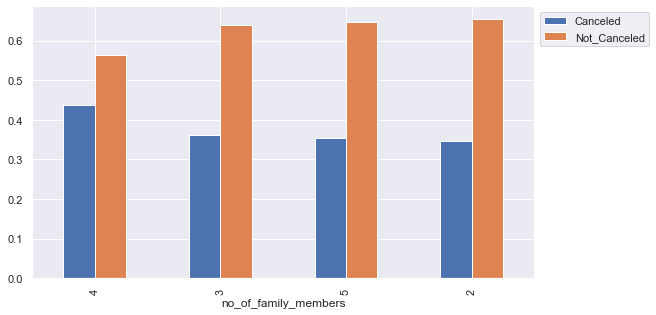

<IPython.core.display.Javascript object>

In [50]:
## Complete the code to plot stacked barplot for no of family members and booking status
unstacked_barplot(family_data, "no_of_family_members", "booking_status")

- Customers who have upto 4 number of family members are likely to cancel, this may be because they may decided to go for a cheaper accomodation type like airbnb because of family size and to save cost.
- 43% of families with upto 4 members cancelled

**Analysing the customer who stay for at least a day at the hotel.**

In [51]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [52]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled  Total  % Canceled  % Not_Canceled
total_days                                                               
All                 6115         10979  17094   35.772786       64.227214
3                   2183          3689   5872   37.176431       62.823569
4                   1387          2977   4364   31.782768       68.217232
5                    738          1593   2331   31.660232       68.339768
2                    639          1301   1940   32.938144       67.061856
6                    465           566   1031   45.101843       54.898157
7                    383           590    973   39.362795       60.637205
8                     79           100    179   44.134078       55.865922
10                    58            51    109   53.211009       46.788991
9                     53            58    111   47.747748       52.252252
14                    27             5     32   84.375000       15.625000
15                    26             5

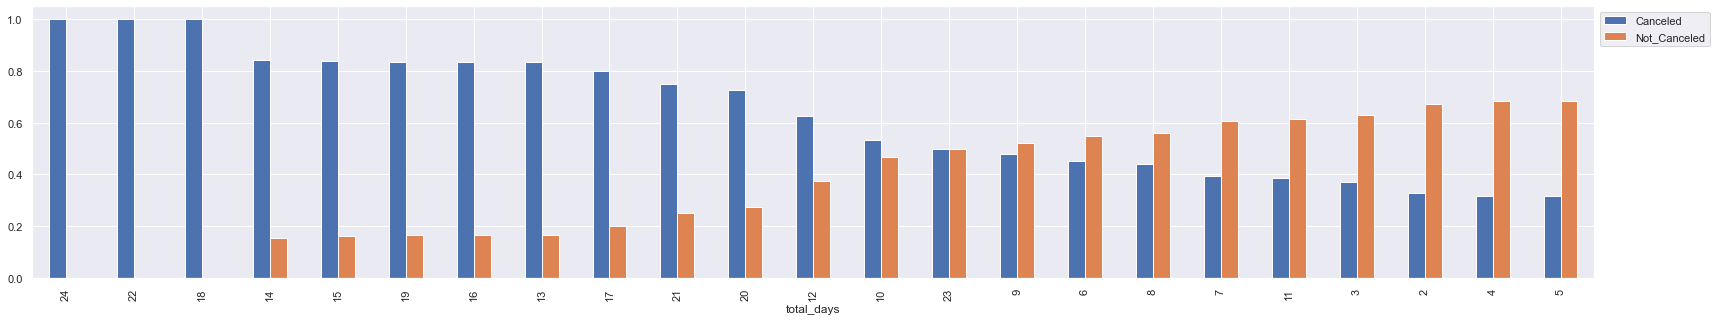

<IPython.core.display.Javascript object>

In [53]:
# plot barplot for total days and booking status
unstacked_barplot(stay_data, "total_days", "booking_status")

- Customers that booked a room for a total number of 10 days of stay and above are at least 50% likely to cancel their booking
- All the customers that booked a room for 24, 22, and 18 days total duration of stay cancelled the booking.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

note! Is the customer a repeated guest? (0 - No, 1- Yes)

booking_status  Canceled  Not_Canceled  Total  % Canceled  % Not_Canceled
repeated_guest                                                           
All                11885         24390  36275   32.763611       67.236389
0                  11869         23476  35345   33.580422       66.419578
1                     16           914    930    1.720430       98.279570
------------------------------------------------------------------------------------------------------------------------


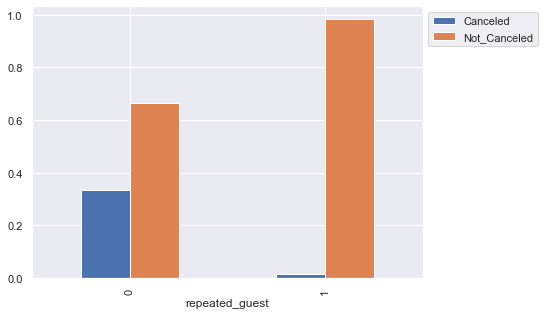

<IPython.core.display.Javascript object>

In [54]:
unstacked_barplot(df, "repeated_guest", "booking_status")

- 98.3% of guest who are actually repeated guest did not cancel
- Only 1.7% of guest who are actually repeated guest cancelled
- 33.58% of first timer guests cancelled their bookings

**Let's find out what are the busiest months in the hotel.**

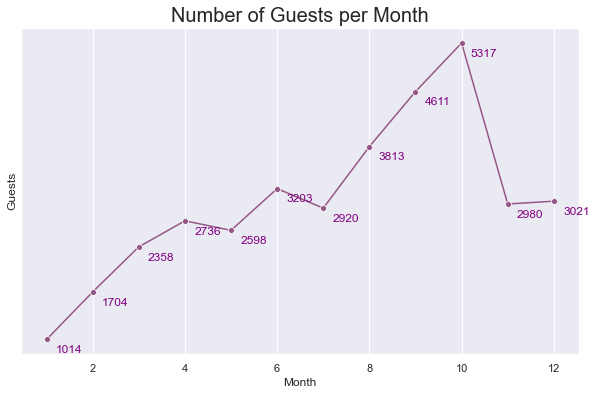

<IPython.core.display.Javascript object>

In [55]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plot line graph
sns.set(rc={"figure.figsize": (10, 6)})
ax = sns.lineplot(x="Month", y="Guests", data=monthly_data, marker="o", color="#965786")
plt.title("Number of Guests per Month", fontsize=20)
plt.yticks([])  # this removes the yticks
# plt.ylabel("")  # this removes the ylabel('counts')

for x, y in zip(monthly_data["Month"], monthly_data["Guests"]):
    plt.text(x=x + 0.2, y=y - 200, s="{:.0f}".format(y), color="purple")

- The busiest month in the hotel is the month of October with about 5317 bookings
- the other busy months are June, August, December all with just a little above 3000 bookings per month.

**Let's check the percentage of bookings canceled in each month.**

booking_status  Canceled  Not_Canceled  Total  % Canceled  % Not_Canceled
arrival_month                                                            
All                11885         24390  36275   32.763611       67.236389
10                  1880          3437   5317   35.358285       64.641715
9                   1538          3073   4611   33.355021       66.644979
8                   1488          2325   3813   39.024390       60.975610
7                   1314          1606   2920   45.000000       55.000000
6                   1291          1912   3203   40.305963       59.694037
4                    995          1741   2736   36.366959       63.633041
5                    948          1650   2598   36.489607       63.510393
11                   875          2105   2980   29.362416       70.637584
3                    700          1658   2358   29.686175       70.313825
2                    430          1274   1704   25.234742       74.765258
12                   402          2619

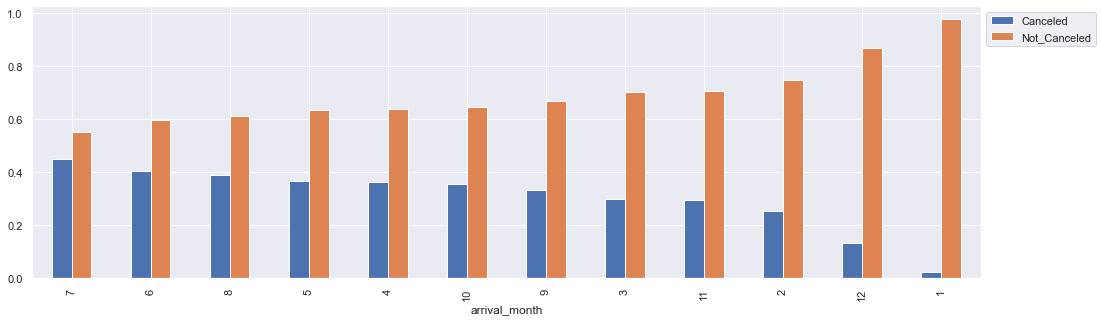

<IPython.core.display.Javascript object>

In [56]:
unstacked_barplot(df, "arrival_month", "booking_status")

- The month of July has the highest percentage of bookings canceled. ~45% of the bookings were cancelled
- The other months with high percentage of bookings canceled are June, August and May.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

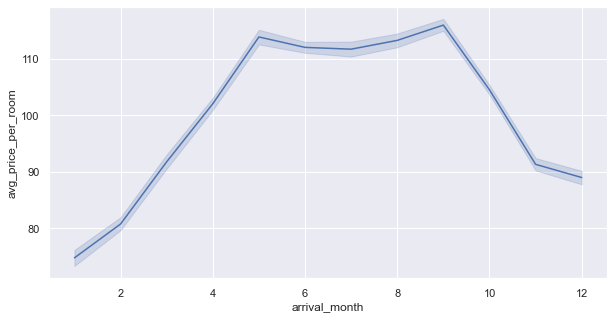

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="arrival_month", y="avg_price_per_room")
plt.show()

- Room prices are affordable early in the year. (January, February, March) ranging from \\$95 and below
- Room prices gets relatively expensive in the middle of the year (May, June, July, August,September)


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)`

### Outlier Check

- Let's check for outliers in the data.

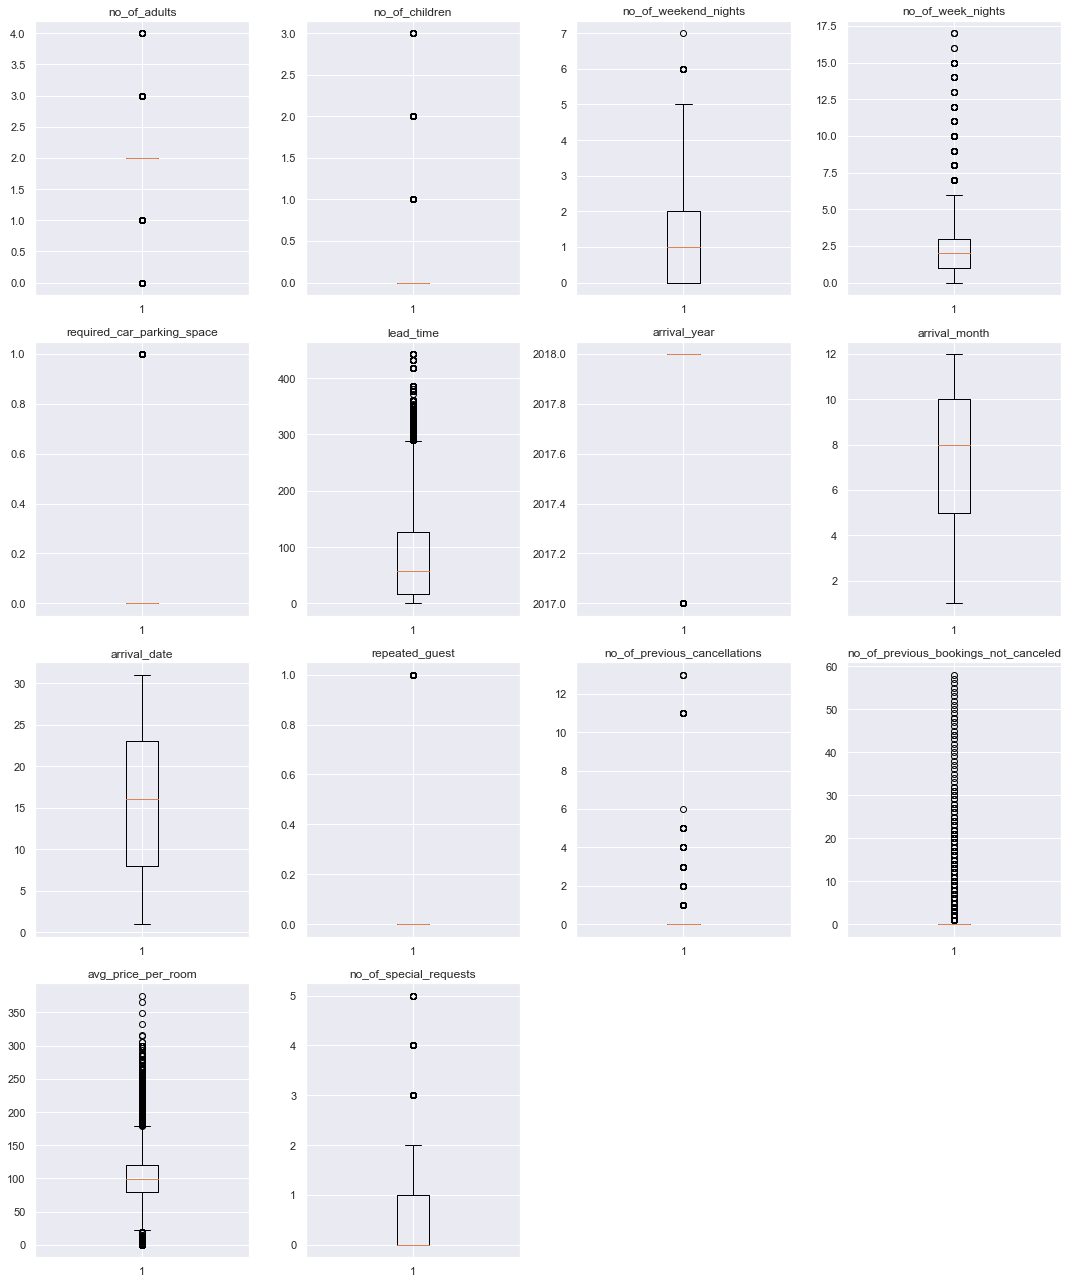

<IPython.core.display.Javascript object>

In [58]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 18))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We will not be treating the outliers since all are genuine values.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [59]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

### Data Preparation

In [60]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [61]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion

### Model can make wrong predictions as:
- Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking. (False Negatives)
- Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. (False Positive)

### Which case is more important?
**Both the cases are important as:**

- If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

- If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.

### How do we reduce the losses?
- Hotel would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

### First, I'll create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
- The model_performance_classification_statsmodels function will be used to check the model performance of models.
- The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [62]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [63]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression (with statsmodels library)

In [64]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter(
    "ignore", ConvergenceWarning
)  # This will ignore convergence warning if any when fitting the model

<IPython.core.display.Javascript object>

In [65]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))

lg = logit.fit(disp=False)
# setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                  0.3292
Time:                        11:25:54   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of a booking being a cancelled decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of a booking being a cancelled increases with the increase of corresponding attribute value.

- Since the p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- These variables might contain multicollinearity, which will affect the p-values.

- I will remove multicollinearity from the data using Variation Inflation Factor to get reliable coefficients and p-values.



## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [66]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [67]:
checking_vif(X_train)

feature           VIF
0                                  const  3.949769e+07
1                           no_of_adults  1.351135e+00
2                         no_of_children  2.093583e+00
3                   no_of_weekend_nights  1.069484e+00
4                      no_of_week_nights  1.095711e+00
5             required_car_parking_space  1.039972e+00
6                              lead_time  1.395175e+00
7                           arrival_year  1.431904e+00
8                          arrival_month  1.276334e+00
9                           arrival_date  1.006795e+00
10                        repeated_guest  1.783576e+00
11          no_of_previous_cancellations  1.395693e+00
12  no_of_previous_bookings_not_canceled  1.652000e+00
13                    avg_price_per_room  2.068603e+00
14                no_of_special_requests  1.247981e+00
15         type_of_meal_plan_Meal Plan 2  1.273283e+00
16         type_of_meal_plan_Meal Plan 3  1.025258e+00
17        type_of_meal_plan_Not Selected  1.273060e+00
18        room_type_reserved_Room_Type 2  1.105954e+00
19        room_type_reserved_Room_Type 3  1.003303e+00
20        room_type_reserved_Room_Type 4  1.363606e+00
21        room_type_reserved_Room_Type 5  1.028000e+00
22        room_type_reserved_Room_Type 6  2.056136e+00
23        room_type_reserved_Room_Type 7  1.118156e+00
24     market_segment_type_Complementary  4.502756e+00
25         market_segment_type_Corporate  1.692829e+01
26           market_segment_type_Offline  6.411564e+01
27            market_segment_type_Online  7.118026e+01

<IPython.core.display.Javascript object>

- Except for a few dummy variables, none of the variables exhibit high multicollinearity, so the values in the summary are reliable.

### Dropping high p-value variables (removing the insignificant features (p-value>0.05).)
- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.
    
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [68]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [69]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [70]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425731
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 02 Jul 2022   Pseudo R-squ.:                  0.3282
Time:                        11:25:57   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600    

<IPython.core.display.Javascript object>

##### Checking model performance for training data

In [71]:
# Checking model performance for training data
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.805451  0.632668    0.73907  0.681742

<IPython.core.display.Javascript object>

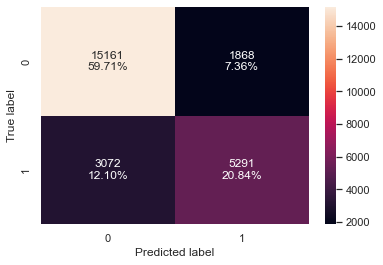

<IPython.core.display.Javascript object>

In [72]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

### Converting coefficients to odds
- The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
- Therefore, odds = exp(b)
- The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [73]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0       1.11491        1.165459              1.114697   
Change_odd% -100.0      11.49096       16.545927             11.469662   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.042584                    0.202961   1.015833   
Change_odd%           4.258406                  -79.703947   1.583312   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.571951       0.958388        0.064782   
Change_odd%     57.195078      -4.161197      -93.521802   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.257118            1.019368   
Change_odd%                     25.711810            1.936838   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.229963                       1.178464   
Change_odd%              -77.003739                      17.846408   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.331095                        0.701041   
Change_odd%                       33.109465                      -29.895882   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.753645                        0.478845   
Change_odd%                      -24.635508                      -52.115481   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.379771                        0.238271   
Change_odd%                      -62.022895                      -76.172939   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.453263                     0.167728  
Change_odd%                     -54.673731                   -83.227238

<IPython.core.display.Javascript object>

### Coefficient interpretations

- Number of Adults: Holding all other features constant, a unit change in number of Adults will increase the odds of a booking being cancelled by 1.114 times or a 11.48% increase in the odds of having a booking cancelled.


- Number of previous cancellations: Holding all other features constant, a unit change in number of previous cancellations will increase the odds of a booking being cancelled by 1.257 times or a 25.70% increase in the odds of having a booking cancelled.


- Number of special requests: Holding all other features constant, a unit change in number of special requests will decrease the odds of a booking being cancelled by 0.229 times or a 77.0% decrease in the odds of having a booking cancelled.


- Repeated guest: Holding all other features constant, a unit change in repeated guest will decrease the odds of a booking being cancelled by 0.064 times or a 93.51% decrease in the odds of having a booking cancelled.


- Average price per room: Holding all other features constant, a unit change in average price per room will increase the odds of a booking being cancelled by 1.019 times or a 1.94% increase in the odds of having a booking cancelled.

### ROC-AUC
- ROC-AUC on training set

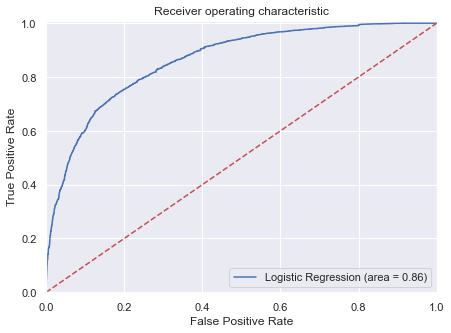

<IPython.core.display.Javascript object>

In [74]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement
- Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [75]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37005225587084706


<IPython.core.display.Javascript object>

### Checking model performance on training set after getting optimal threshold using AUC-ROC curve

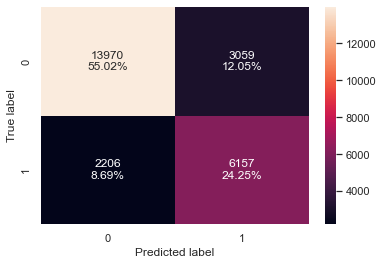

<IPython.core.display.Javascript object>

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [77]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.792651  0.736219   0.668077  0.700495

<IPython.core.display.Javascript object>

- F1 score increased from 0.68 intially to 0.70, i can say that Model performance has improved.
- Model is giving a recall of 0.73 as compared to initial model which was giving a recall of 0.63.
- Precision has decreased from 0.738 to 0.667.

### Let's use Precision-Recall curve and see if we can find a better threshold

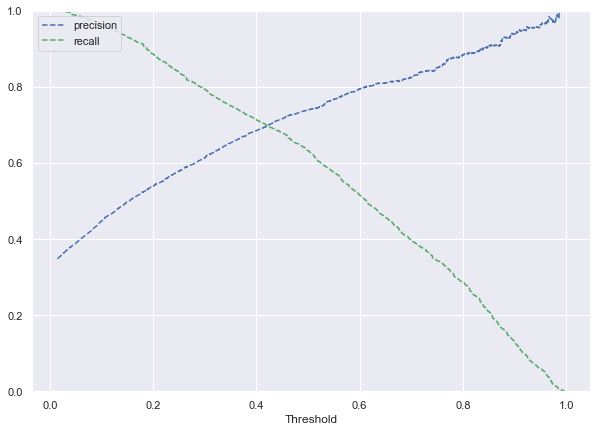

<IPython.core.display.Javascript object>

In [78]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At threshold around 0.42 we will get almost equal precision  which is the right optimal_threshold F1 score

In [79]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

### Checking model performance on training set after using Precision-Recall curve to find a better threshold

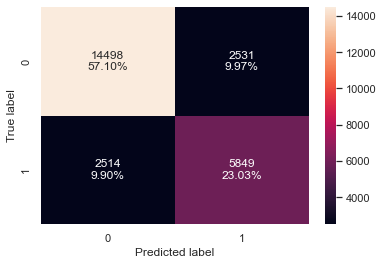

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [81]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy   Recall  Precision       F1
0  0.801315  0.69939   0.697971  0.69868

<IPython.core.display.Javascript object>

- F1 has improved as compared to the initial model.
- Model is not giving a better performance with 0.37 threshold found using AUC-ROC curve.

## Let's check the performance on the test set
**Using model with default threshold**

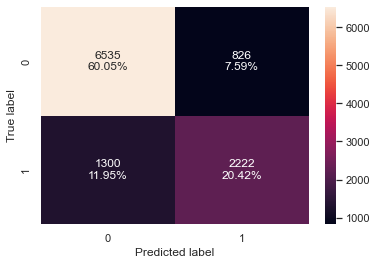

<IPython.core.display.Javascript object>

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [83]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.804649  0.630892   0.729003  0.676408

<IPython.core.display.Javascript object>

- **ROC curve on test set**

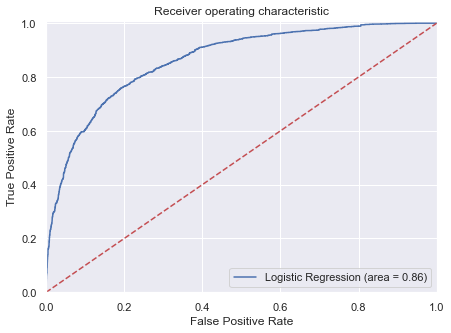

<IPython.core.display.Javascript object>

In [84]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37, i.e optimal_threshold_auc_roc**

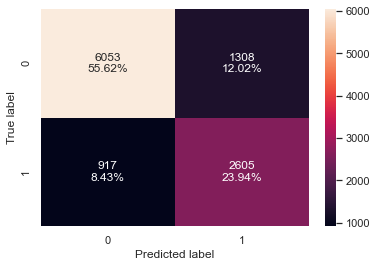

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [86]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision       F1
0  0.795553  0.739637    0.66573  0.70074

<IPython.core.display.Javascript object>

**Using model with threshold = 0.42, i.e optimal_threshold_curve**

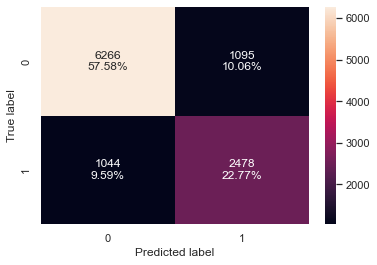

<IPython.core.display.Javascript object>

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [88]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision       F1
0  0.803455  0.703578   0.693535  0.69852

<IPython.core.display.Javascript object>

## Model performance summary

In [89]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                0.805451   
Recall                                  0.632668   
Precision                               0.739070   
F1                                      0.681742   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.792651   
Recall                               0.736219   
Precision                            0.668077   
F1                                   0.700495   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.801315  
Recall                               0.699390  
Precision                            0.697971  
F1                                   0.698680

<IPython.core.display.Javascript object>

In [90]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.37 Threshold  \
Accuracy                         0.804649                            0.795553   
Recall                           0.630892                            0.739637   
Precision                        0.729003                            0.665730   
F1                               0.676408                            0.700740   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.803455  
Recall                               0.703578  
Precision                            0.693535  
F1                                   0.698520

<IPython.core.display.Javascript object>

# Decision Tree model

### Data Preparation for Modeling

In [91]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0  

<IPython.core.display.Javascript object>

In [92]:
# Creating training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [93]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


<IPython.core.display.Javascript object>

In [94]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
- The model_performance_classification_sklearn function will be used to check the model performance of models.
- The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [95]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [96]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Building Decision Tree Model

In [97]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking model performance on training set

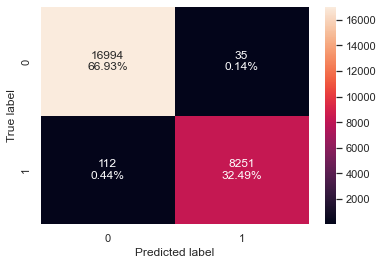

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(model, X_train, y_train)

In [99]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

<IPython.core.display.Javascript object>

### Checking model performance on test set

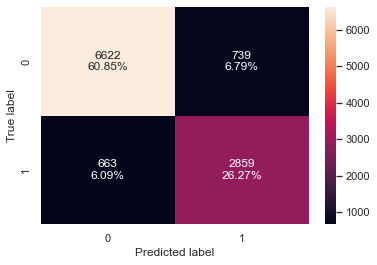

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(model, X_test, y_test)

In [101]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision       F1
0  0.871175  0.811755   0.794608  0.80309

<IPython.core.display.Javascript object>

- Model is giving good and generalized results on training and test set.

### Visualizing the Decision Tree before pruning

In [102]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

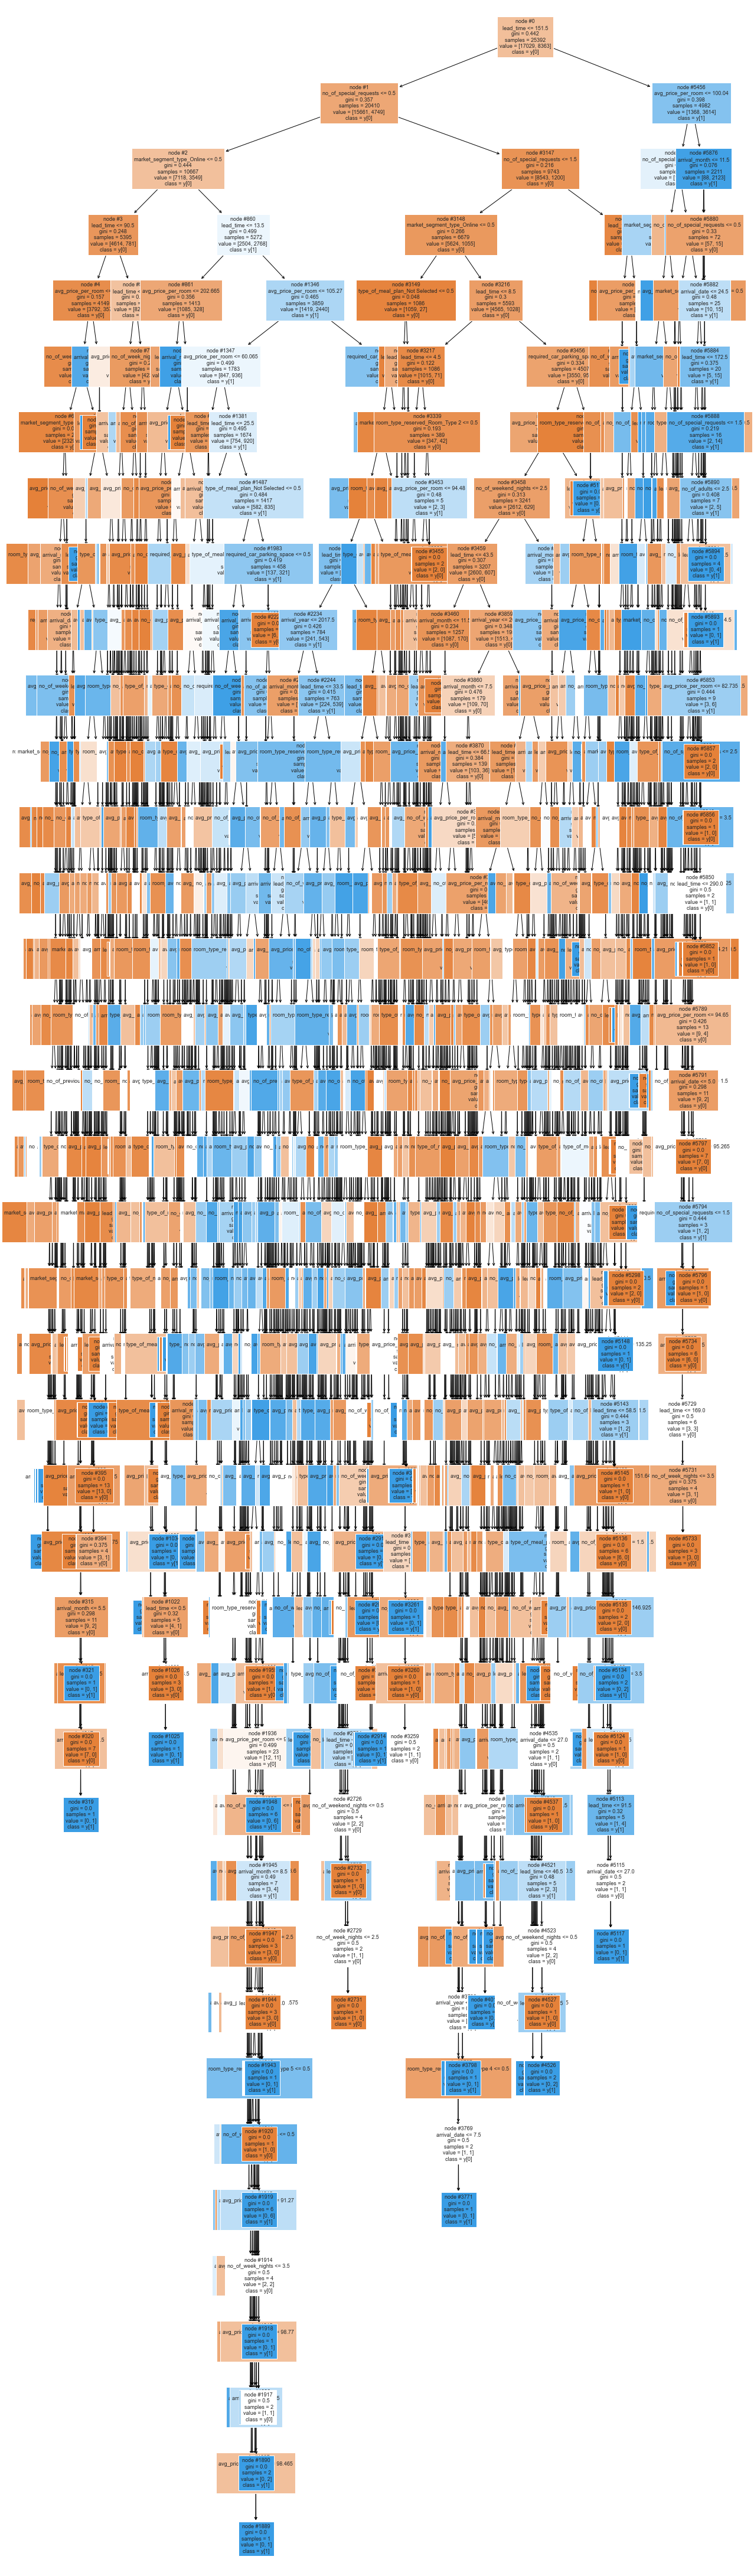

<IPython.core.display.Javascript object>

In [103]:
plt.figure(figsize=(20, 80))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- The tree above is very complex, we may get a bettet model if pruned

In [104]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

<IPython.core.display.Javascript object>

**Before pruning the tree let's check the important features.**

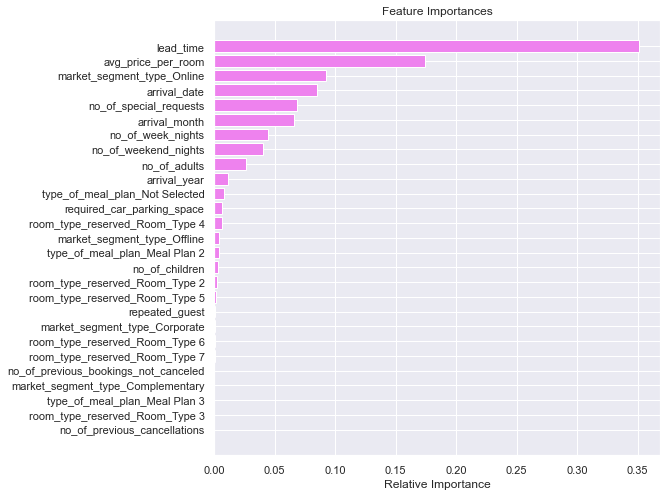

<IPython.core.display.Javascript object>

In [105]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Before pruning the tree, the two most important features are:
- lead_time
- avg_price_per_room
- Market_segment_type_online
    

## Decision Tree (Pre-pruning)
### Using GridSearch for Hyperparameter tuning of our tree model
- Let's see if we can improve our model performance even more.

In [106]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

### Checking performance on training set

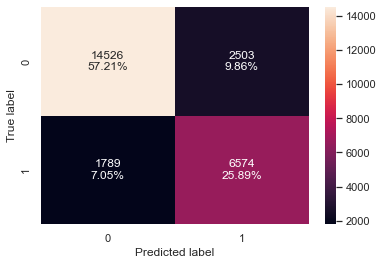

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [108]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0   0.83097  0.786082   0.724248  0.753899

<IPython.core.display.Javascript object>

### Checking model performance on test set

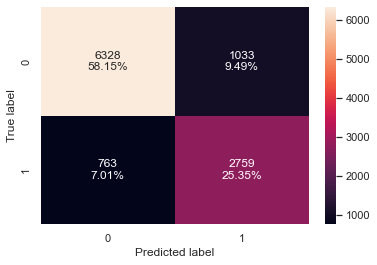

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [110]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.834972  0.783362   0.727584  0.754444

<IPython.core.display.Javascript object>

- The model performed worse compared to the initial model.
- The F1 dropped from the 0.80 in the initial model to 0.75

### Visualizing the Decision Tree

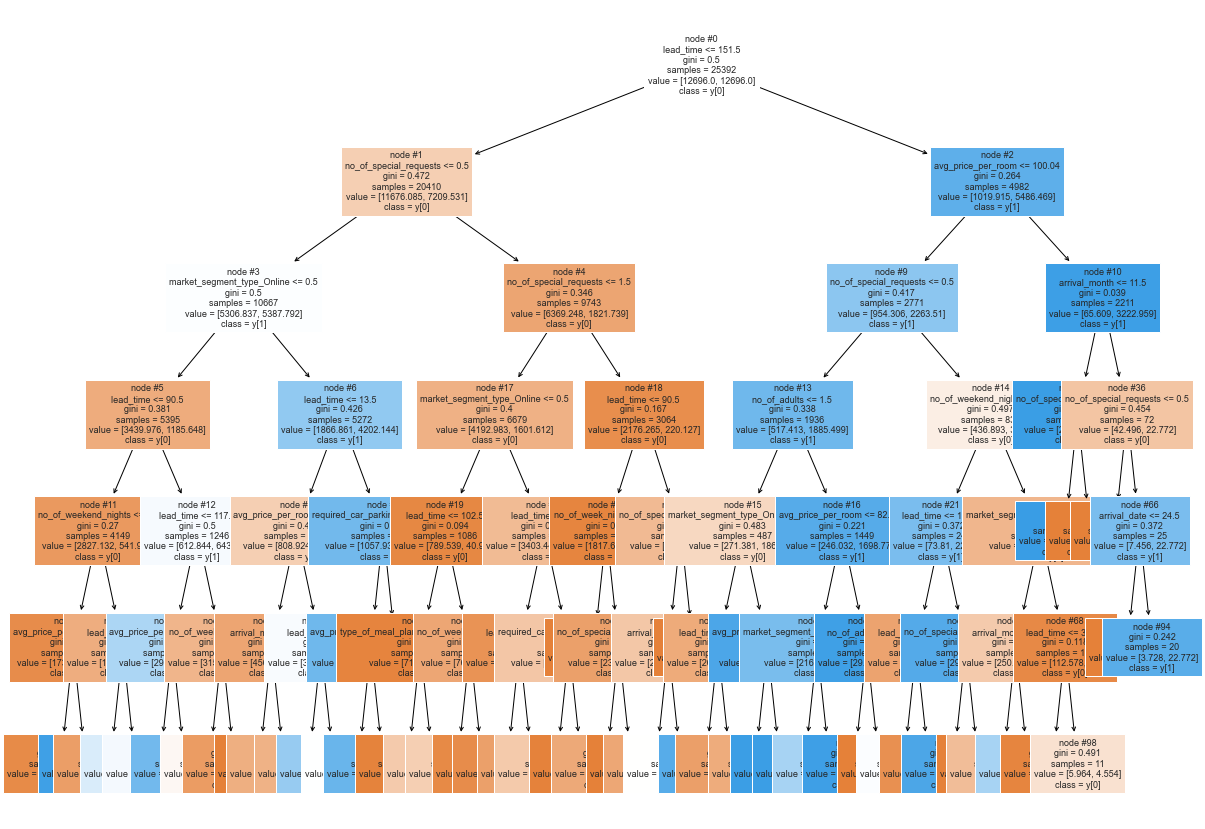

<IPython.core.display.Javascript object>

In [111]:
plt.figure(figsize=(20, 15))

out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- We are getting a simplified tree after pre-pruning.

In [112]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

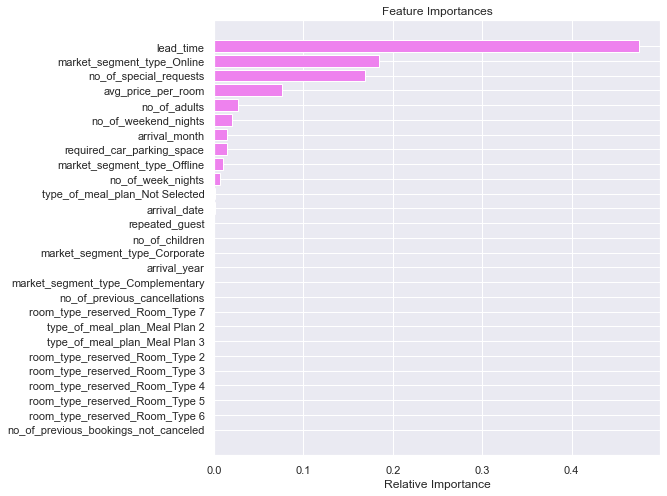

<IPython.core.display.Javascript object>

In [113]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

After pre-pruning, the four most important features are:

- lead_time
- market_segment_type_online
- number of special request
- average price per room

## Decision Tree (Post-pruning)
#### Cost Complexity Pruning

In [114]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [115]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     1.303920e-20    0.008376
3     1.303920e-20    0.008376
4     1.303920e-20    0.008376
...            ...         ...
1889  8.901596e-03    0.328058
1890  9.802243e-03    0.337860
1891  1.271875e-02    0.350579
1892  3.412090e-02    0.418821
1893  8.117914e-02    0.500000

[1894 rows x 2 columns]

<IPython.core.display.Javascript object>

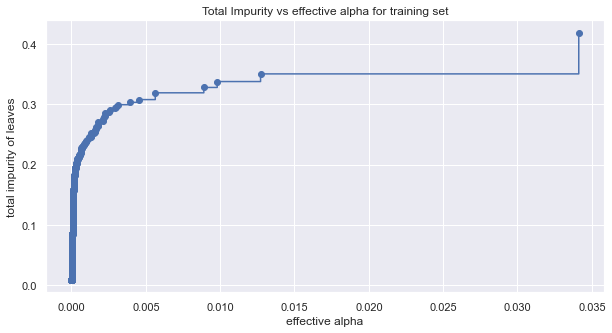

<IPython.core.display.Javascript object>

In [116]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [117]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136954


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

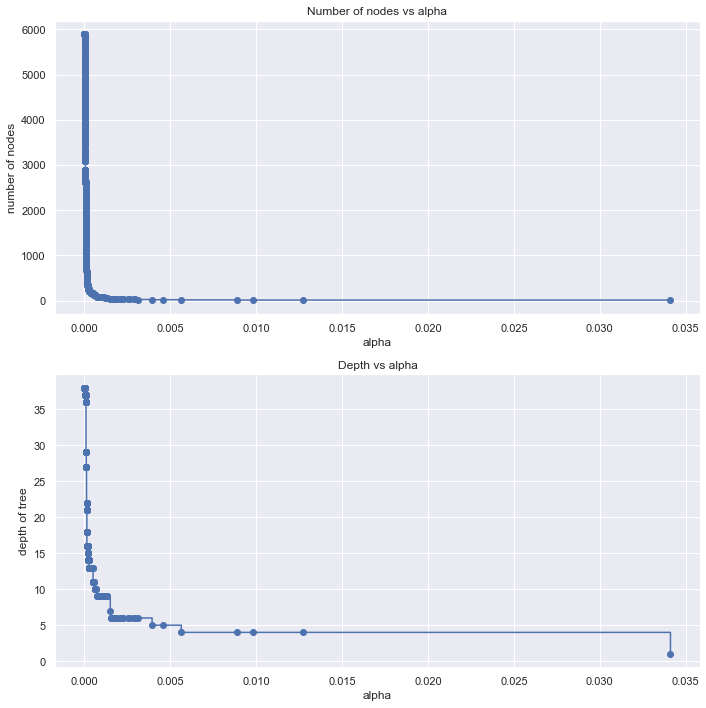

<IPython.core.display.Javascript object>

In [118]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [119]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

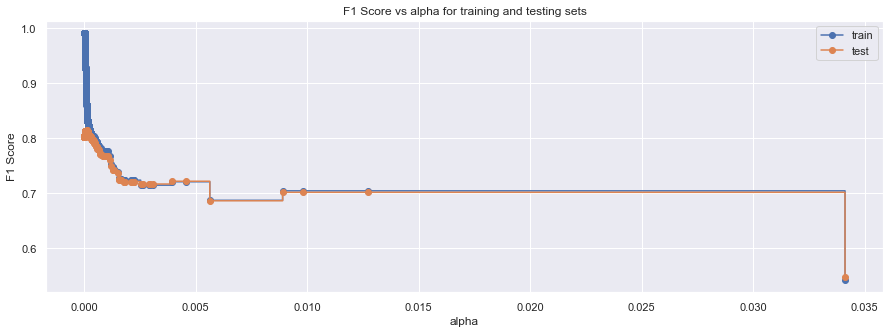

<IPython.core.display.Javascript object>

In [120]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [121]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00011676062470521685, random_state=1)


<IPython.core.display.Javascript object>

## Model Performance Comparison and Conclusions

### Checking performance on training set

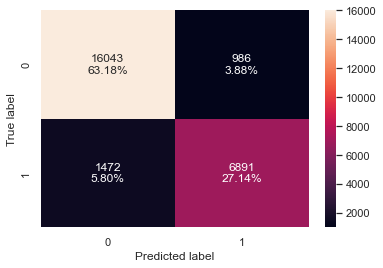

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [123]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.903198  0.823987   0.874825  0.848645

<IPython.core.display.Javascript object>

### Checking performance on testing set

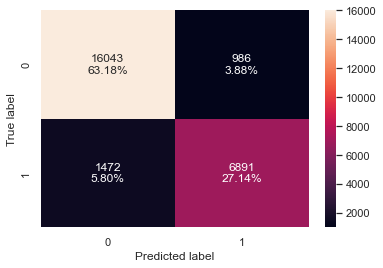

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [125]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy   Recall  Precision        F1
0  0.882753  0.79046   0.838049  0.813559

<IPython.core.display.Javascript object>

- With post-pruning we are getting good and generalized model performance on both training and test set.
- The F1 score for the test data is better than both the initial tree and pre-pruned tree .

### Visualizing the Decision Tree

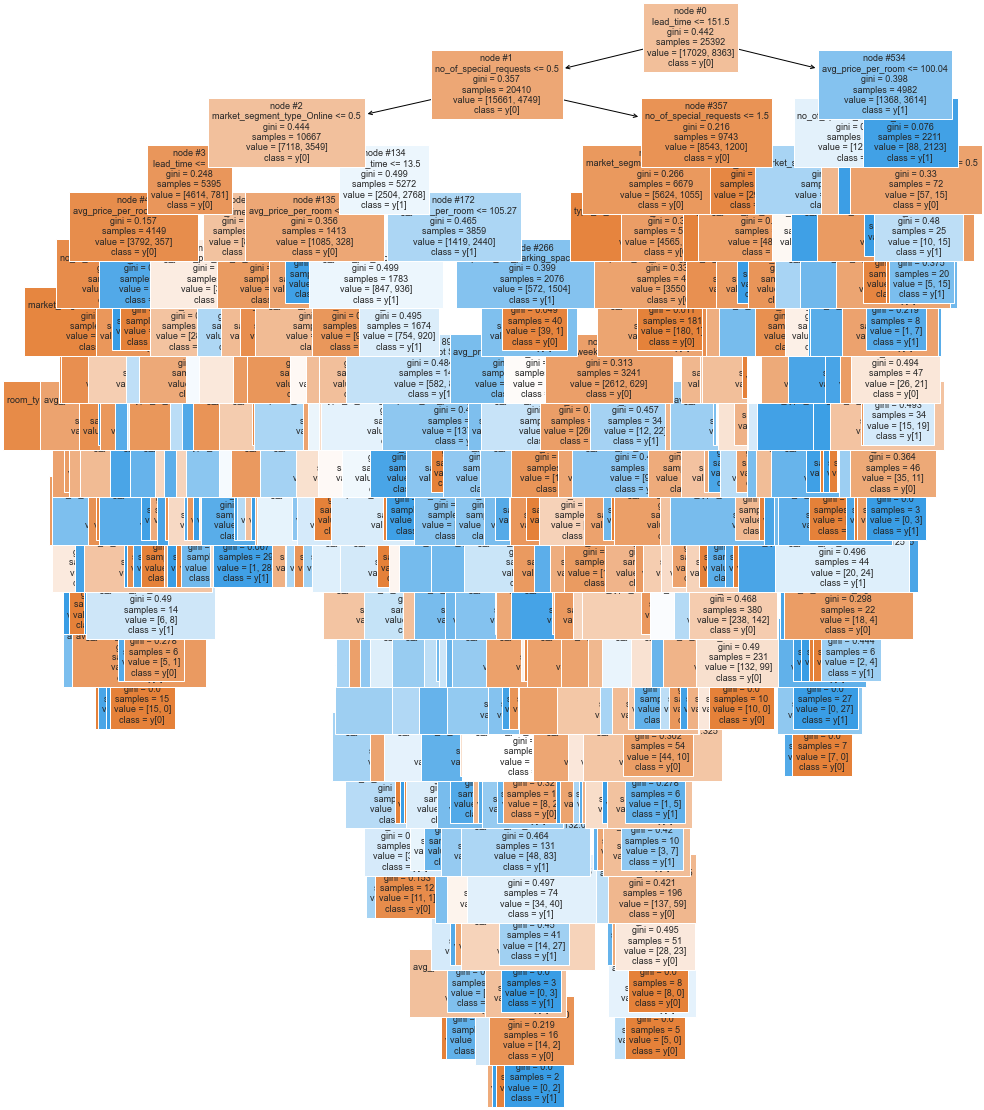

<IPython.core.display.Javascript object>

In [126]:
plt.figure(figsize=(15, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

- The tree looks more complex that the pre-pruned tree

In [127]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [509.00, 30.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [42.00, 5.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- arrival_d

<IPython.core.display.Javascript object>

In [128]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.398747
avg_price_per_room                    0.155257
market_segment_type_Online            0.135688
no_of_special_requests                0.098256
arrival_month                         0.056673
arrival_date                          0.037938
no_of_weekend_nights                  0.034505
no_of_adults                          0.024580
no_of_week_nights                     0.018797
arrival_year                          0.013868
required_car_parking_space            0.009807
market_segment_type_Offline           0.004971
room_type_reserved_Room_Type 4        0.003097
type_of_meal_plan_Not Selected        0.002635
type_of_meal_plan_Meal Plan 2         0.002537
room_type_reserved_Room_Type 2        0.001125
room_type_reserved_Room_Type 5        0.001055
no_of_children                        0.000465
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_gues

<IPython.core.display.Javascript object>

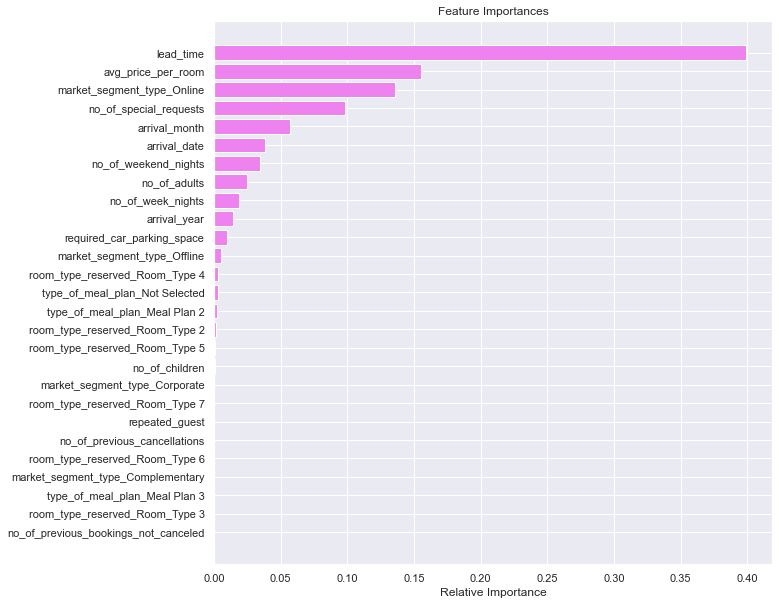

<IPython.core.display.Javascript object>

In [129]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Before pruning the tree, the four most important features are:

- lead_time
- avg_price_per_room
- market_segment_type_online
- number_of_special_request

## Comparison of Models and Final Model Selection

In [130]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994211                     0.830970   
Recall                  0.986608                     0.786082   
Precision               0.995776                     0.724248   
F1                      0.991171                     0.753899   

           Decision Tree (Post-Pruning)  
Accuracy                       0.903198  
Recall                         0.823987  
Precision                      0.874825  
F1                             0.848645

<IPython.core.display.Javascript object>

In [131]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.871175                     0.834972   
Recall                  0.811755                     0.783362   
Precision               0.794608                     0.727584   
F1                      0.803090                     0.754444   

           Decision Tree (Post-Pruning)  
Accuracy                       0.882753  
Recall                         0.790460  
Precision                      0.838049  
F1                             0.813559

<IPython.core.display.Javascript object>

## Conclusion, Actionable Insights and Recommendations

- All the Logistics Regrssion models are giving a generalized performance on training and test set.
- All the Decision Tree models are giving a generalized performance on  test set.
- The highest F1 score for out of sample data is 81.4% derived from the post-pruned decision tree model. 
- Our best model is the model from decision tree(post-pruned) and I will make our reccommendations based on that
- The model built can be used to predict if a booking will be cancelled or not and can correctly identify 81.4% of cancelled bookings


- Lead_time, average price per room and market segment type (online) are the most important variables in determining if a booking will be cancelled or not
    - Special attention should be given to these variables.
- Bookings via Online market segment type seems to be more expensive than other market segment types and hence 36.5% of the bookings cancelled. 
    - The hotel should adopt a more affordable and generalized pricing system
- The second and third quartiles of prices of rooms that were cancelled is more than the second and third quartiles of prices of rooms that were not cancelled. Hence price is a factor why people cancel their bookings. 
    - The hotel should considered cutting down the room price to reduce booking cancellation thereby increasing annual turnover
- We can see that the second and third quartiles of the lead time of rooms that were cancelled is much more than the second and third quartiles of lead time of rooms that were not cancelled. This shows that customers having many number of days between the date of booking and the arrival date are likely cancel
    - The hotel should reduce the Number of days between the date of booking and the arrival date to a maximum of 90 days. because from the analysis. if the lead time exceeds 90 days, the bookings tends to be cancelled
- Customers who have upto 4 number of family members are likely to cancel, as they may decide to go for a cheaper accomodation type like airbnb because of family size and to save cost.
    - Large family numbers logically will go for bigger rooms. The hotel should make the prices of bigger rooms as attractive as the smaller rooms to keep large family menmbers from cancelling.
- The months of May, Jube, July and August  have the highest percentage of cancelled bookings. 
    - The hotel should take note of these months, if possible, make special promotion offers and sales during this months
- Customers that booked a room for a total number of 10 days and above are at least 50% likely to cancel their booking.
    - The hotel should consider setting a limit to the maximum number of days per booking especially for first timers. they can renew their bookings if they want continue staying at the hotel after their inital booking.
- 33.58% of first timer guests cancelled their bookings
    - The hotel shold consider giving a discounted price and incentives to first timers





<hr>

# APPENDIX

## Analysis derived from EDA and data overview

- There are 36,275 rows and 19 columns in our dataset
- There are 14 numerical columns and 5 columns with object type
- There are no missing values in our dataset
- There are no duplicate values in our dataset
- The average number of adults per customers' booking details is 2
- The maximum number of adults per customers' booking details is 4
- The median number of weekend nights the guest stayed or booked to stay at the hotel is 1
- The median number of week nights the guest stayed or booked to stay at the hotel is 2
- Most o the guests are first timers
- The average price per room is about \\$103 
- most of the meals ordered were Meal Plan 1 with a total number of 27835 orders
- the most Type of room reserved by the customer is Room_Type 1 with 28130 total reservation 
- 24390 o the bookings were not canceled
- The distribution of lead time is right-skewed
- The boxplot of lead time shows that there are outliers at the right end
- The distribution of average price per room is right-skewed
- The Average price per room has an outlier which is above \\$500 and it can not be expalined. so the outlier was be treated
- 65% of rooms with an average price close of zero has the Complementary market segment type
- 35% of rooms with an average price close of zero has the online market segment type
- The distribution of no_of_previous_cancellations is right-skewed
- A good number of previous booking were not cancelled
- The distribution of arrival date is close to a uniform distribution
- There are no skewness in the arrival month column
- The busiest months according to the distribution is October
- 72% of the bookings are bookings involving two adults
- 92% of the bookings are for adults only without chidren involved
- 9 or 10 numbers of children per booking can not be explained so I treated it as an outlier and replaced with 3 numbers of children
- The plot shows that most customers booked/stayed for 2 week nights
- 32% of previous bookings were for 2 week nights only
- The plot shows that most customers booked/stayed for weekends only booked 1 weekend nights
- 27.6% of previous bookings were for 1 weekend nights only
- Most of the customers do not require parking space
- 96.9% of the customers do not need parking space`
- Most of the customers booked the Meal Plan 1
- 76.1% of meal plan booked by customer is the meal plan 1
- Most of the customers booked the room type 1
- 77.5% of rooms booked by customer is the room type 1
- Most of the customers (14.7%) arrived in October, hence Octoner is the busiest month
- 64.0% of bookings by customer falls under the online market segment type
- More than half (54.5%) of the customers have no special request
- about 31.4% of the customers had a special request
- The class distribution in the target variable is imbalanced.
- We have 67.2% observations for bookings not cancelled and 32.8% observations for bookings that were cancelled.
- number of special request and average price per room show a positive correlation
- number of previous bookings not cancelled and repeated guest show a positive coorelation
- number of previous bookings not cancelled and number of previous cancellation show a positive coorelation
- average price per room and number of children show a positive correlation
- average price per room and number of adults show a positive correlation
- number of adults and repeated guest show a negative correlation
- Bookings via Online market segment type seems to be more expensive
- Bookings via Complimnetry market segment type is the cheapest
- Most people that cancelled are those online market segment type
- 36.5% of online market segment type cancelled
- none from complimentary market segment type cancelled
- The median price per room in the online market segment type for both cancelled and not cancelled status are almost the same
- The median price per room for bookings that were cancelled in the offline and coorperate market segment type is higher than the  median price per room for bookings that were not cancelled in the same market segment type
- Price can be a factor why people cancel their bookings
- Only a tiny fraction of customers with special request cancelled
- There is no significant impact in the price of room for those with special request, when compared to those with no special request
- We can see that the second and third quartiles of prices of rooms that were cancelled is more than the second and third quartiles of prices of rooms that were not cancelled.
- This shows that customers might cancel their booking if they feel they are paying too much for the room.
- We can see that the second and third quartiles of the lead time of rooms that were cancelled is much more than the second and third quartiles of lead time of rooms that were not cancelled.
- This shows that customers having many number of days between the date of booking and the arrival date are likely cancel
- Customers who have upto 4 number of family members are likely to cancel, this may be because they may decided to go for a cheaper accomodation type like airbnb because of family size and to save cost.
- 43% of families with upto 4 members cancelled
- Customers that booked a room for a total number of 10 days of stay and above are at least 50% likely to cancel their booking
- All the customers that booked a room for 24, 22, and 18 days total duration of stay cancelled the booking.
- 98.3% of guest who are actually repeated guest did not cancel
- Only 1.7% of guest who are actually repeated guest cancelled
- 33.58% of first timer guests cancelled their bookings
- The busiest month in the hotel is the month of October with about 5317 bookings
- the other busy months are June, August, December all with just a little above 3000 bookings per month.
- The month of July has the highest percentage of bookings canceled. ~45% of the bookings were cancelled
- The other months with high percentage of bookings canceled are June, August and May.
- Room prices are affordable early in the year. (January, February, March) ranging from \\$95 and below
- Room prices gets relatively expensive in the middle of the year (May, June, July, August,September)


##  A general overview of Univariate visualization of our data

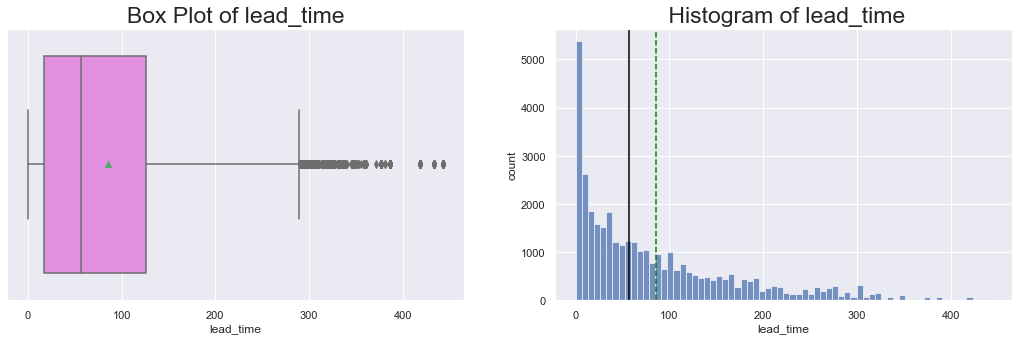

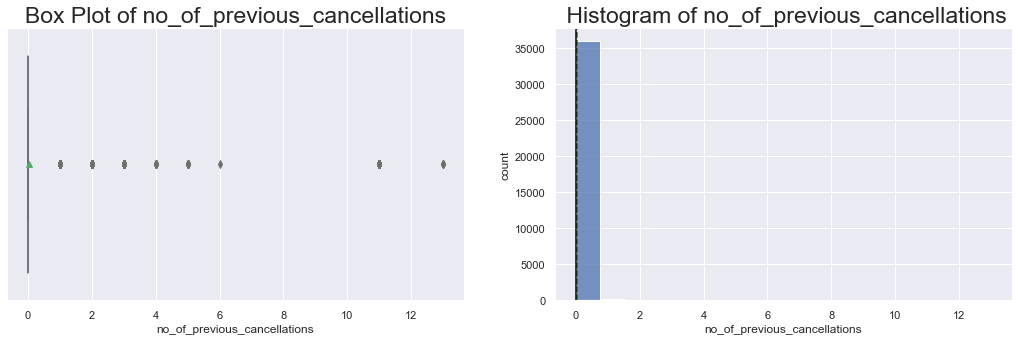

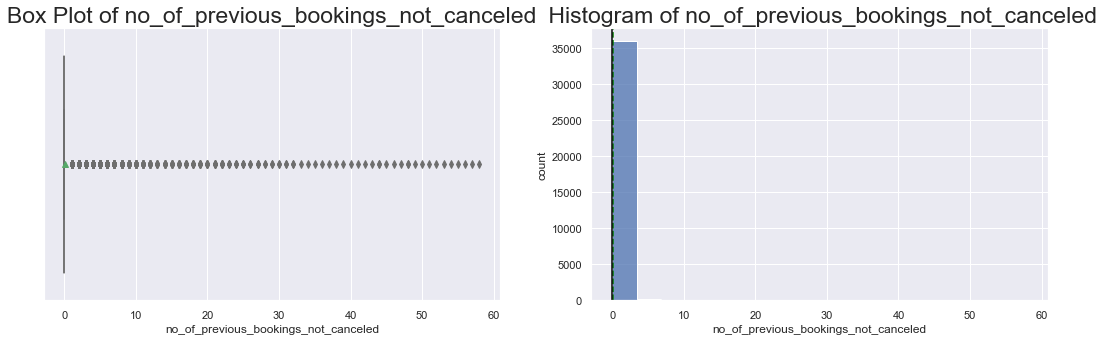

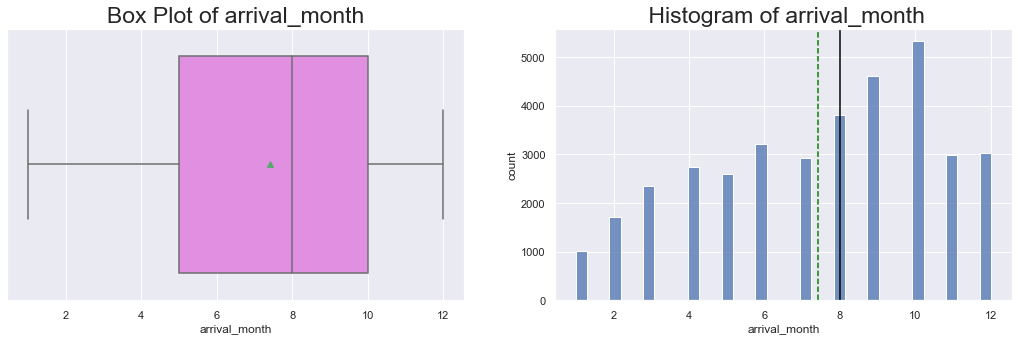

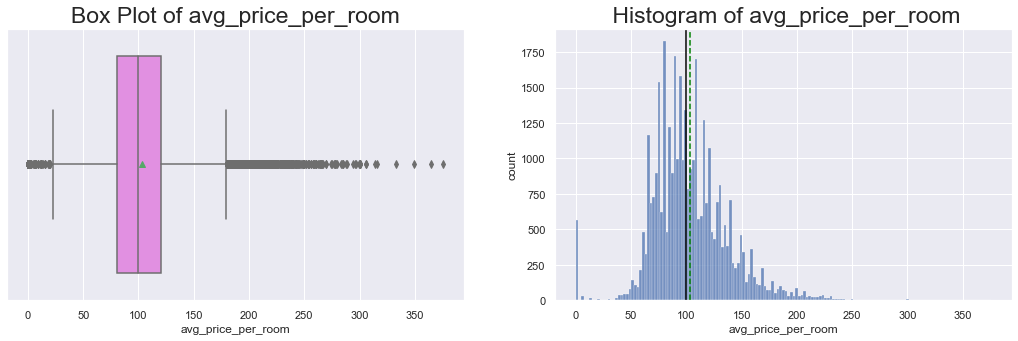

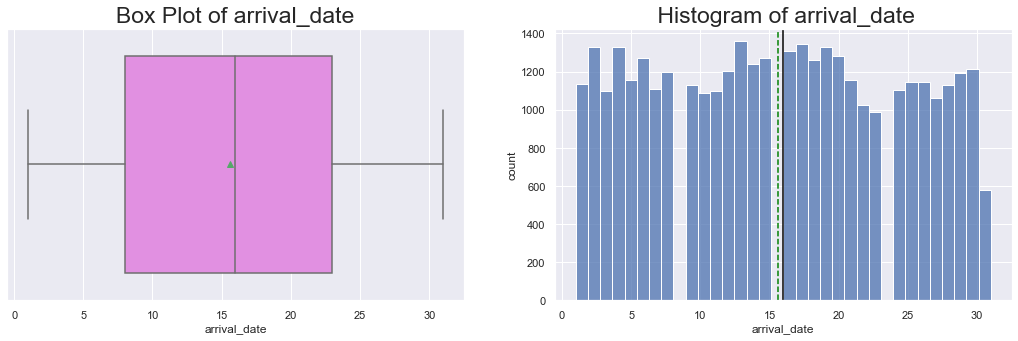

<IPython.core.display.Javascript object>

In [132]:
num_col_list = [
    "lead_time",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "arrival_month",
    "avg_price_per_room",
    "arrival_date",
]
for col in num_col_list:
    print("")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    # plotting the boxplot
    sns.boxplot(data=df, x=col, ax=ax1, showmeans=True, color="violet")
    ax1.set_title(f"Box Plot of {col}", fontsize=23)
    ax1.set_xlabel(col)

    # plotting the histogram
    sns.histplot(data=df, x=col, kde=False, ax=ax2)
    ax2.set_title(f" Histogram of {col}", fontsize=23)
    ax2.set_xlabel(col)
    ax2.set_ylabel("count")
    ax2.axvline(df[col].mean(), color="green", linestyle="--")
    ax2.axvline(df[col].median(), color="black", linestyle="-")

    plt.show()
    print("")
    print("")

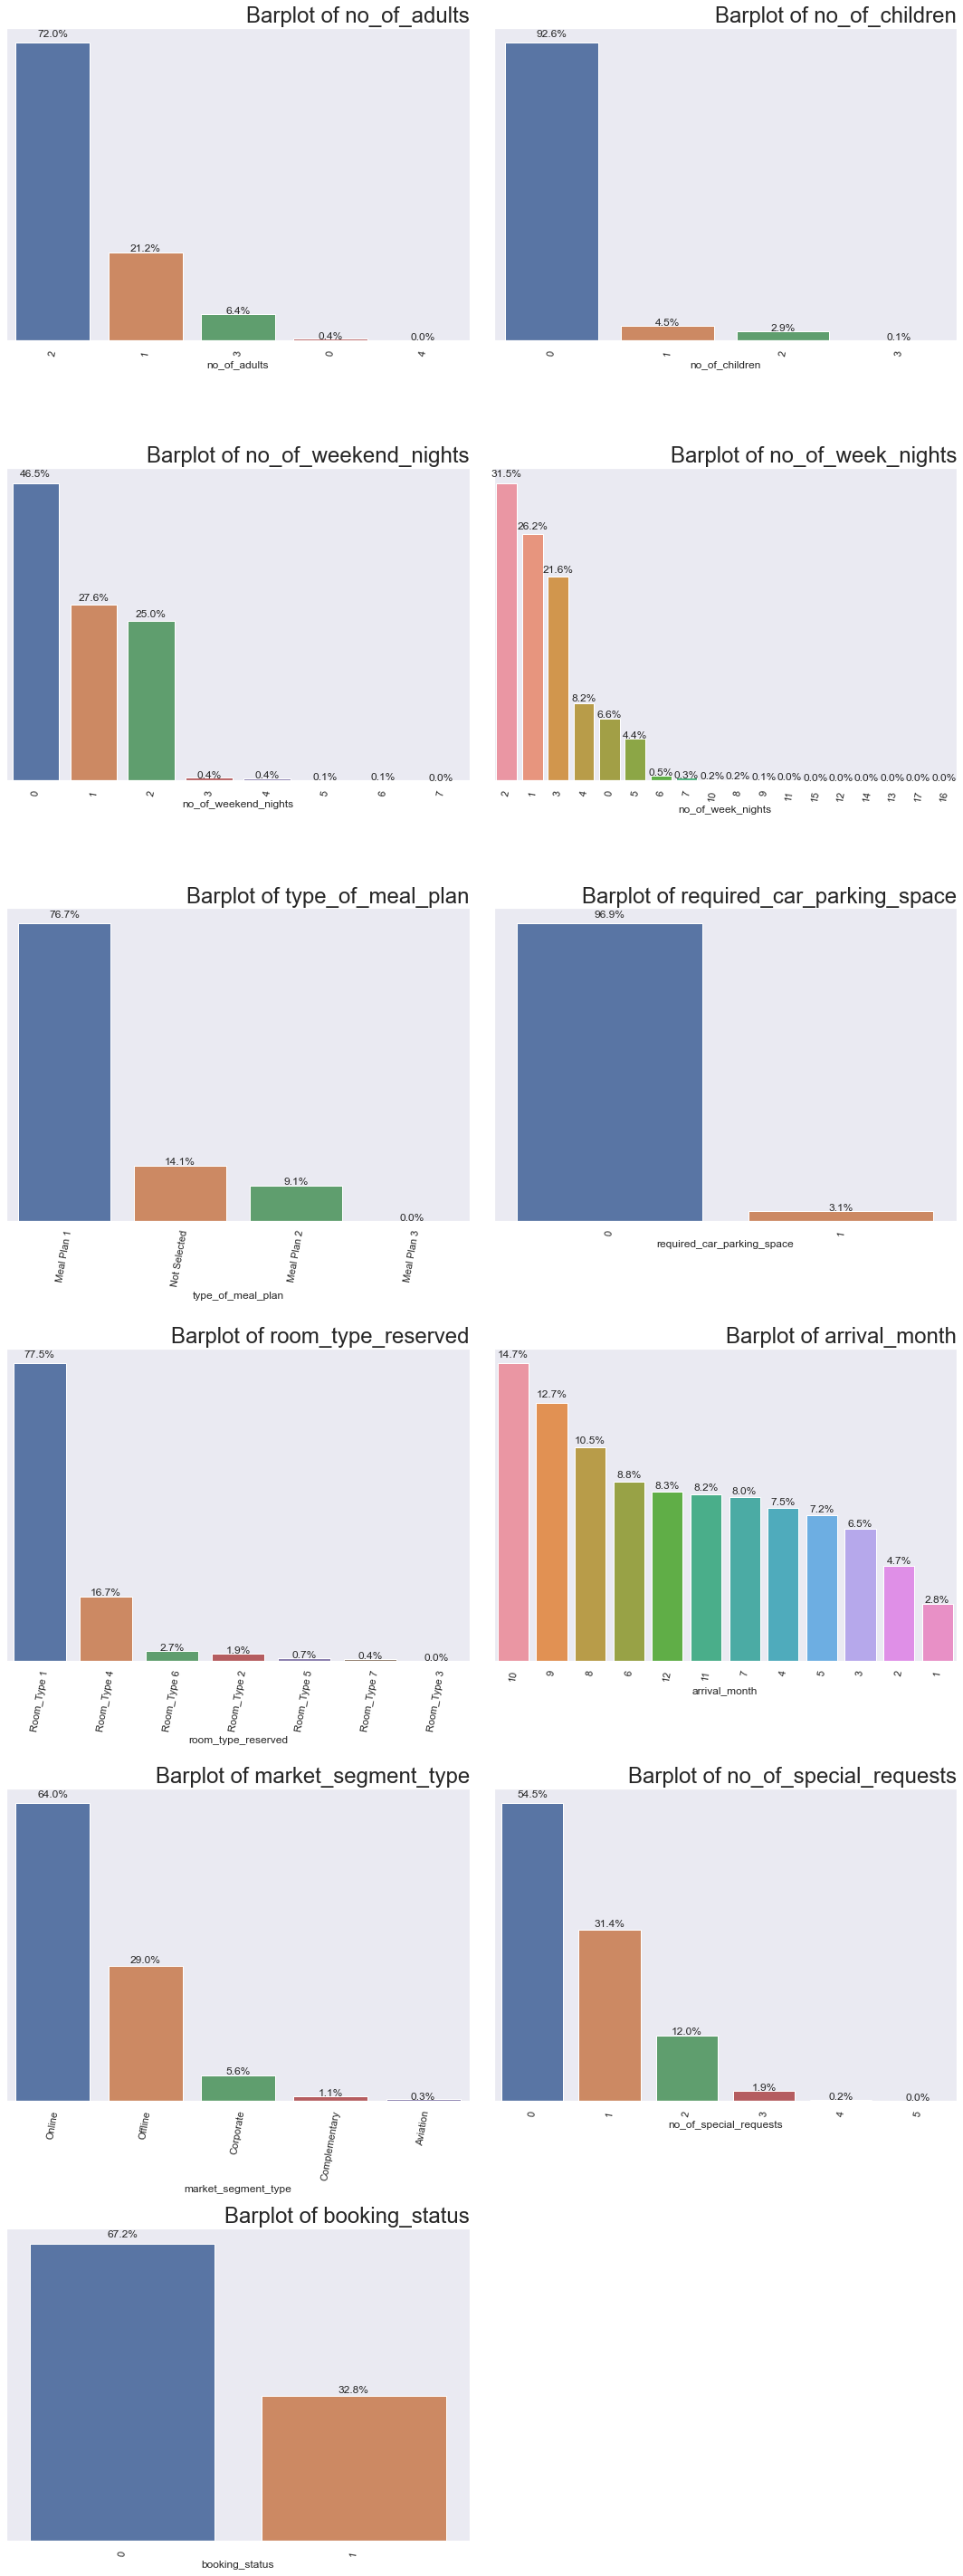

<IPython.core.display.Javascript object>

In [133]:
cat_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "arrival_month",
    "market_segment_type",
    "no_of_special_requests",
    "booking_status",
]
df_cat_col = df[cat_cols]
plt.figure(figsize=(16, 40))
for i, variable in enumerate(cat_cols):
    total = len(df[variable])  # length of the column
    count = df[variable].nunique()
    plt.subplot(6, 2, i + 1)
    # ax=df_cat_col[variable].value_counts().plot(kind='bar', color=['r','b','g','orange','pink'] )
    ax = sns.countplot(
        data=df_cat_col, x=variable, order=df[variable].value_counts().index[:count]
    )

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        label = "{:.1f}%".format(100 * p.get_height() / total)
        x, y = p.get_xy()
        ax.annotate(f"{label}", (x + width / 2, y + height * 1.02), ha="center")
    plt.xticks(rotation=80)
    plt.tight_layout(pad=2)
    plt.title(f"Barplot of {variable}", fontsize=24, loc="right")
    plt.yticks([])  # this removes the yticks
    plt.ylabel("")  # this removes the ylabel('counts')


plt.show()

## A general overview of Bivariate visualization of our data


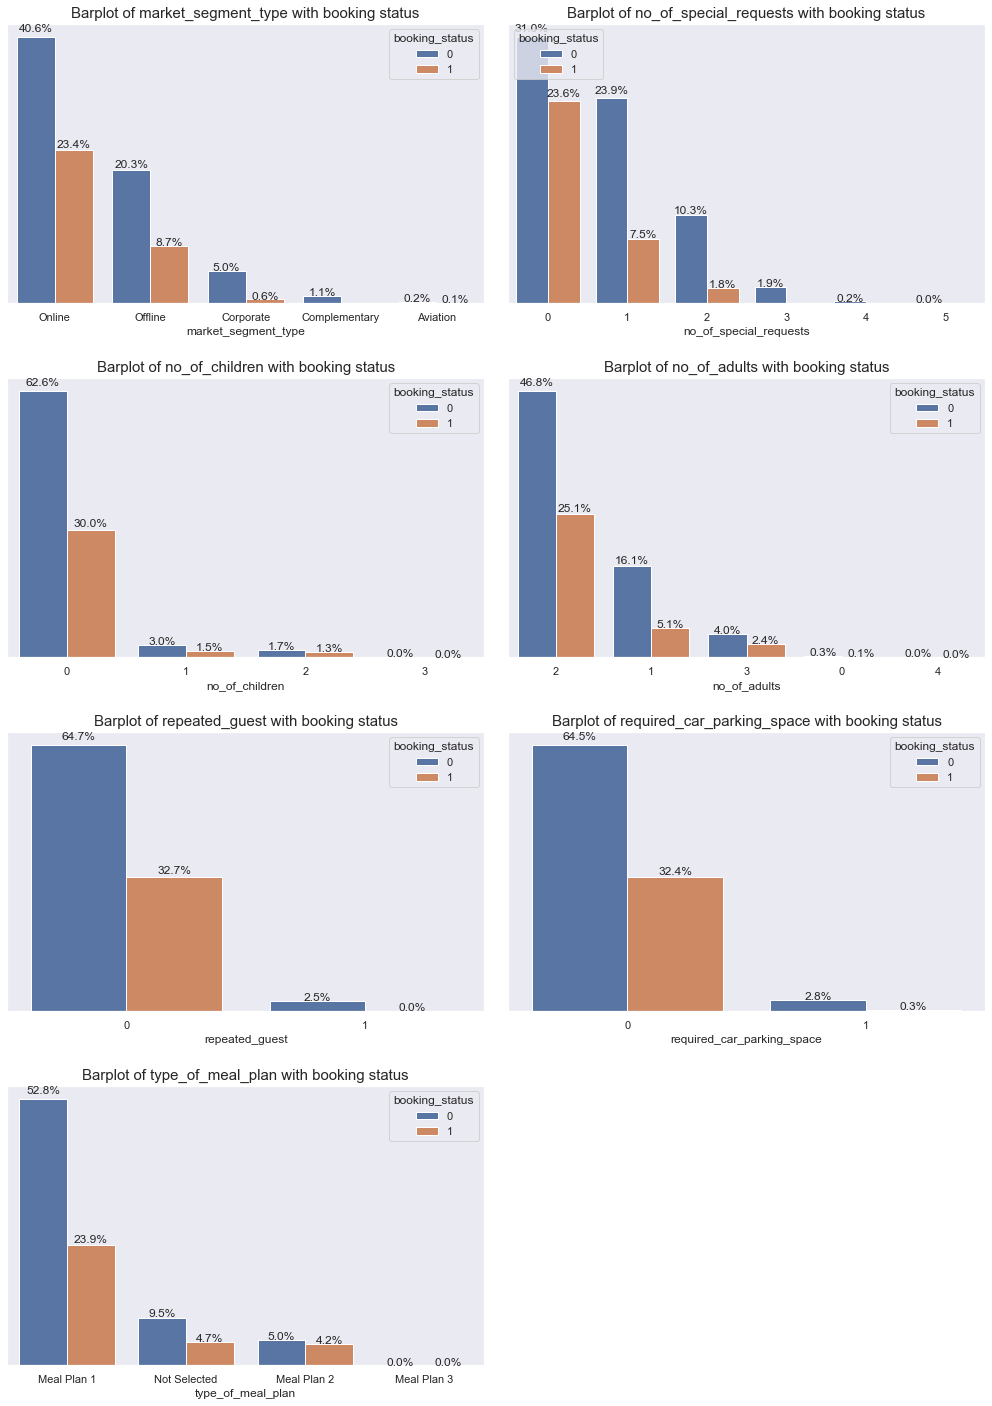

<IPython.core.display.Javascript object>

In [134]:
target_col = "booking status"
cat_cols = [
    "market_segment_type",
    "no_of_special_requests",
    "no_of_children",
    "no_of_adults",
    "repeated_guest",
    "required_car_parking_space",
    "type_of_meal_plan",
]
df_cat_col = df[cat_cols]
plt.figure(figsize=(15, 20))
for i, variable in enumerate(cat_cols):
    total = len(df[variable])  # length of the column
    count = df[variable].nunique()
    plt.subplot(4, 2, i + 1)
    # ax=df_cat_col[variable].value_counts().plot(kind='bar', color=['r','b','g','orange','pink'] )
    # ax=sns.countplot(data=df_cat_col, x=variable, order=data[variable].value_counts().index[:count])
    ax = sns.countplot(
        data=df_cat_col,
        x=variable,
        hue=df["booking_status"],
        order=df[variable].value_counts().index[:count],
    )

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        label = "{:.1f}%".format(100 * p.get_height() / total)
        x, y = p.get_xy()
        ax.annotate(f"{label}", (x + width / 2, y + height * 1.02), ha="center")
    # plt.xticks(rotation=80)
    plt.tight_layout(pad=2)
    plt.title(f"Barplot of {variable} with {target_col}", fontsize=15)
    plt.yticks([])  # this removes the yticks
    plt.ylabel("")  # this removes the ylabel('counts')

plt.show()